In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **TON_IOT**

In [ ]:
# Load the TON IoT dataset from a CSV file and retrieve its shape
# Ensure the CSV file is located at the specified path
df_TON_IOT = pd.read_csv('/content/drive/MyDrive/train_test_network (1).csv')
shape = df_TON_IOT.shape


In [ ]:
# Display the first few rows of the DataFrame to understand its structure
df_TON_IOT.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,OTH,...,0,0,-,-,-,-,-,-,1,backdoor
1,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000102,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
2,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000148,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
3,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000113,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
4,192.168.1.193,49180,192.168.1.37,8080,tcp,-,0.000130,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor


In [ ]:
df_TON_IOT.head()
# Print the shape of the DataFrame
print('Dataframe shape: ', shape)
# Print the number of rows in the DataFrame
print('Number of rows: ', shape[0])
# Print the number of columns in the DataFrame
print('Number of columns: ', shape[1])
#df.shape

Dataframe shape:  (211043, 44)
Number of rows:  211043
Number of columns:  44




**Null and duplicated values**

Checking Missing Value

Following code shows dataset does not have any missing values

In [ ]:
# Check for missing values in the DataFrame df_TON_IOT
# This will return the count of missing values for each column in the DataFrame
df_TON_IOT.isnull().sum()

,0
src_ip,0
src_port,0
dst_ip,0
dst_port,0
proto,0
service,0
duration,0
src_bytes,0
dst_bytes,0
conn_state,0


**Checking duplicated values**

Now we need to check if there is any duplicated value, because it does not make any sense to have duplicate value in our analysis. I will check shape, so the dataset does not have a duplicated value.

In [ ]:
df_TON_IOT[df_TON_IOT.duplicated()].shape

(20569, 44)

In [ ]:

# Display the duplicate rows
duplicate_rows = df_TON_IOT[df_TON_IOT.duplicated()]
print(duplicate_rows)


               src_ip  src_port          dst_ip  dst_port proto service  \
21      192.168.1.193     49180    192.168.1.37      8080   tcp       -   
151     192.168.1.193     49194    192.168.1.33      8080   tcp       -   
322     192.168.1.193     49234    192.168.1.37      8080   tcp       -   
330     192.168.1.193     49234    192.168.1.37      8080   tcp       -   
348     192.168.1.193     49236    192.168.1.37      8080   tcp       -   
...               ...       ...             ...       ...   ...     ...   
211032   192.168.1.32     47514  18.194.169.124        80   tcp       -   
211033   192.168.1.32     47518  18.194.169.124        80   tcp       -   
211034   192.168.1.32     47634  18.194.169.124        80   tcp       -   
211035   192.168.1.32     48134  18.194.169.124        80   tcp       -   
211036   192.168.1.32     48156  18.194.169.124        80   tcp       -   

        duration  src_bytes  dst_bytes conn_state  ...  \
21      0.000127          0          0   

In [ ]:
# Remove duplicate rows and keep the first occurrence
df_TON_IOT_cleaned = df_TON_IOT.drop_duplicates()


In [ ]:
# Check for duplicate rows in the cleaned DataFrame df_TON_IOT_cleaned
# The .duplicated() method returns a boolean Series indicating whether each row is a duplicate
# We filter the DataFrame to only include duplicate rows and use .shape to get the dimensions of the result
df_TON_IOT_cleaned[df_TON_IOT_cleaned.duplicated()].shape

(0, 44)

In [ ]:
df_TON_IOT.shape

(211043, 44)

In [ ]:
df_TON_IOT_cleaned.shape

(190474, 44)

In [ ]:
df_TON_IOT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190474 entries, 0 to 211042
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190474 non-null  object 
 1   src_port                190474 non-null  int64  
 2   dst_ip                  190474 non-null  object 
 3   dst_port                190474 non-null  int64  
 4   proto                   190474 non-null  object 
 5   service                 190474 non-null  object 
 6   duration                190474 non-null  float64
 7   src_bytes               190474 non-null  int64  
 8   dst_bytes               190474 non-null  int64  
 9   conn_state              190474 non-null  object 
 10  missed_bytes            190474 non-null  int64  
 11  src_pkts                190474 non-null  int64  
 12  src_ip_bytes            190474 non-null  int64  
 13  dst_pkts                190474 non-null  int64  
 14  dst_ip_bytes            1

 **codage of string**

In [ ]:
df_TON_IOT_cleaned.shape

(190474, 44)

In [ ]:
# Drop the 'label' column from the DataFrame, as it is not needed for multi_class classification
df_TON_IOT_cleaned = df_TON_IOT_cleaned.drop('label', axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Specify the columns that need to be encoded as categorical variables
columns_to_encode = ['src_ip', 'dst_ip', 'proto', 'service','conn_state','dns_query', 'dns_AA', 'dns_RD','dns_RA','dns_rejected','ssl_version','ssl_cipher','ssl_resumed','ssl_established','ssl_subject','ssl_issuer', 'http_trans_depth', 'http_method','http_uri','http_version','http_user_agent','http_orig_mime_types','http_resp_mime_types','weird_name','weird_addl','weird_notice']
# Initialize LabelEncoder for each specified column and transform the data
for column in columns_to_encode:
    le = LabelEncoder()
    df_TON_IOT_cleaned[column] = le.fit_transform(df_TON_IOT_cleaned[column])
df_TON_IOT_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190474 entries, 0 to 211042
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   src_ip                  190474 non-null  int64  
 1   src_port                190474 non-null  int64  
 2   dst_ip                  190474 non-null  int64  
 3   dst_port                190474 non-null  int64  
 4   proto                   190474 non-null  int64  
 5   service                 190474 non-null  int64  
 6   duration                190474 non-null  float64
 7   src_bytes               190474 non-null  int64  
 8   dst_bytes               190474 non-null  int64  
 9   conn_state              190474 non-null  int64  
 10  missed_bytes            190474 non-null  int64  
 11  src_pkts                190474 non-null  int64  
 12  src_ip_bytes            190474 non-null  int64  
 13  dst_pkts                190474 non-null  int64  
 14  dst_ip_bytes            1

In [ ]:
df_TON_IOT_cleaned.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_request_body_len,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,type
0,26,4444,201,49178,1,0,290.371539,101568,2592,0,...,0,0,0,0,0,0,0,0,0,backdoor
1,16,49180,210,8080,1,0,0.000102,0,0,1,...,0,0,0,0,0,0,0,0,0,backdoor
2,16,49180,210,8080,1,0,0.000148,0,0,1,...,0,0,0,0,0,0,0,0,0,backdoor
3,16,49180,210,8080,1,0,0.000113,0,0,1,...,0,0,0,0,0,0,0,0,0,backdoor
4,16,49180,210,8080,1,0,0.000130,0,0,1,...,0,0,0,0,0,0,0,0,0,backdoor


In [ ]:
# Count the number of instances for each unique value in the 'type'
print(df_TON_IOT_cleaned.groupby("type").size())

type
backdoor      18711
ddos          19993
dos           18992
injection     19964
mitm           1041
normal        42040
password      19861
ransomware    14735
scanning      20000
xss           15137
dtype: int64


In [ ]:
# Separate the features (X) from the target variable (y)
X_TON_IOT = df_TON_IOT_cleaned.drop('type', axis = 1)
y_TON_IOT = df_TON_IOT_cleaned['type']
X_TON_IOT.shape, y_TON_IOT.shape

((190474, 42), (190474,))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_TON_IOT_train, X_TON_IOT_test,y_TON_IOT_train, y_TON_IOT_test = train_test_split(X_TON_IOT, y_TON_IOT, test_size=0.4, random_state = 1337
)
# Further split the test set into validation and test sets
# 50% of the original test set will be used for validation and 50% for the final test
X_TON_IOT_valid, X_TON_IOT_test2,y_TON_IOT_valid, y_TON_IOT_test2 = train_test_split(X_TON_IOT_test, y_TON_IOT_test, test_size=0.5, random_state = 1337
)

In [ ]:
from imblearn.combine import SMOTETomek

# Create the SMOTE-TOMEK
smt = SMOTETomek(random_state=42)

# Apply SMOTE-TOMEK to balance the classes
X_TON_IOT_train, y_TON_IOT_train = smt.fit_resample(X_TON_IOT_train, y_TON_IOT_train)


In [ ]:
from imblearn.combine import SMOTETomek
# Apply SMOTE-TOMEK to balance the classes
X_TON_IOT_valid, y_TON_IOT_valid = smt.fit_resample(X_TON_IOT_valid, y_TON_IOT_valid)


In [ ]:
y_TON_IOT.value_counts()

,count
type,
normal,42040
scanning,20000
ddos,19993
injection,19964
password,19861
dos,18992
backdoor,18711
xss,15137
ransomware,14735


In [ ]:

from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler for feature scaling
scaling = StandardScaler()
# Fit the scaler on the training data and transform it
X_TON_IOT_train = scaling.fit_transform(X_TON_IOT_train)
# Transform the validation data using the fitted scaler
X_TON_IOT_valid = scaling.transform(X_TON_IOT_valid)
# Transform the test data using the fitted scaler
X_TON_IOT_test2 = scaling.transform(X_TON_IOT_test2)

In [ ]:
# Reshape data
print(X_TON_IOT_train.shape)

X_TON_IOT_train = X_TON_IOT_train.reshape(X_TON_IOT_train.shape[0], X_TON_IOT_train.shape[1], 1)
X_TON_IOT_valid = X_TON_IOT_valid.reshape(X_TON_IOT_valid.shape[0], X_TON_IOT_valid.shape[1], 1)
X_TON_IOT_test2 = X_TON_IOT_test2.reshape(X_TON_IOT_test2.shape[0], X_TON_IOT_test2.shape[1], 1)
print(X_TON_IOT_train.shape)

(250000, 42)
(250000, 42, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder to convert string labels to integers
label_encoder = LabelEncoder()
# Encode training labels into integers
y_TON_IOT_train_encoded = label_encoder.fit_transform(y_TON_IOT_train)
# Encode validation labels into integers using the same encoder
y_TON_IOT_valid_encoded = label_encoder.transform(y_TON_IOT_valid)

# Determine the number of unique classes for one-hot encoding
num_classes = len(label_encoder.classes_)
# Convert encoded training labels to one-hot encoding format
y_TON_IOT_train_one_hot = to_categorical(y_TON_IOT_train_encoded, num_classes=num_classes)
# Convert encoded validation labels to one-hot encoding format
y_TON_IOT_valid_one_hot = to_categorical(y_TON_IOT_valid_encoded, num_classes=num_classes)

#***lstm***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np

# Function to adjust the learning rate dynamically
def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float
# Define callbacks for training
lr_scheduler = LearningRateScheduler(scheduler)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_loss', save_best_only=True)

# LSTM model definition
model_lstm = Sequential()
model_lstm.add(LSTM(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm.add(BatchNormalization())
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(10, activation='softmax'))  # Output layer for multi-class classification
# Compile the model with Adam optimizer and categorical cross-entropy loss
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
# Train the LSTM model
history_lstm = model_lstm.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                              validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                              callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time
 # training_time
print(f"Le temps d'entraînement du modèle LSTM est de {training_time:.2f} secondes.")

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.4406 - loss: 2.7184 - val_accuracy: 0.1022 - val_loss: 2.7339 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.8014 - loss: 0.7847 - val_accuracy: 0.2061 - val_loss: 2.8924 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.8770 - loss: 0.4615 - val_accuracy: 0.8923 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.8994 - loss: 0.3532 - val_accuracy: 0.8831 - val_loss: 0.3421 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9048 - loss: 0.3113 - val_accuracy: 0.9182 - val_loss: 0.2733 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9071 - loss: 0.3012 - val_accuracy: 0.9195 - val_loss: 0.2383 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.9

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999765  0.999882  0.999824      8508
           1   0.966698  0.969675  0.968185      8442
           2   0.959594  0.983785  0.971539      8449
           3   0.866146  0.840085  0.852916      8442
           4   0.982600  0.971715  0.977127      8485
           5   0.999528  0.998349  0.998938      8480
           6   0.865698  0.877121  0.871372      8488
           7   0.997298  0.998236  0.997767      8504
           8   0.982249  0.978543  0.980392      8482
           9   0.986913  0.990416  0.988662      8452

    accuracy                       0.960829     84732
   macro avg   0.960649  0.960781  0.960672     84732
weighted avg   0.960696  0.960829  0.960720     84732



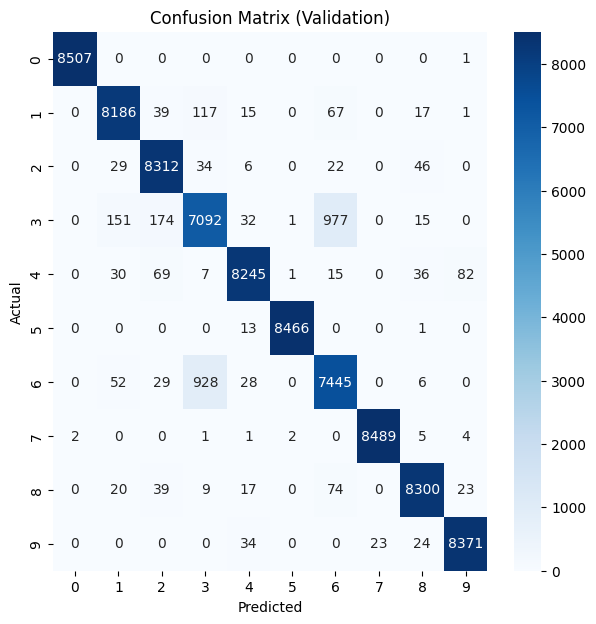

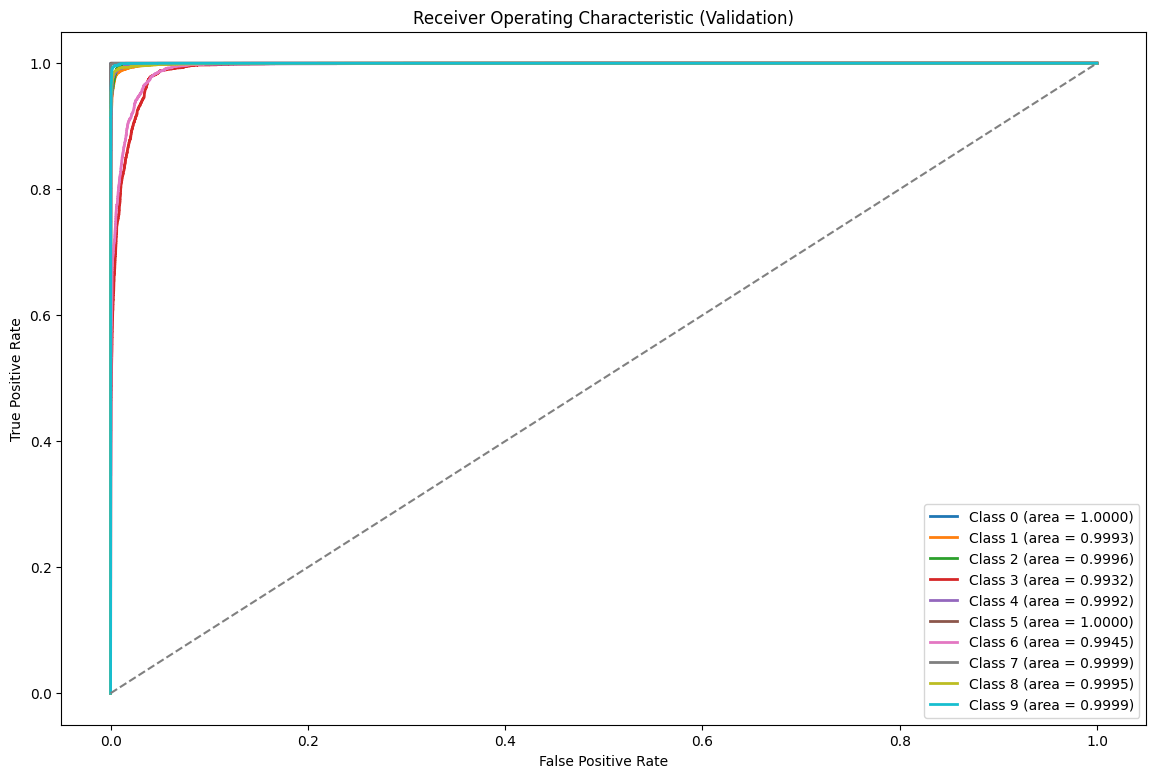

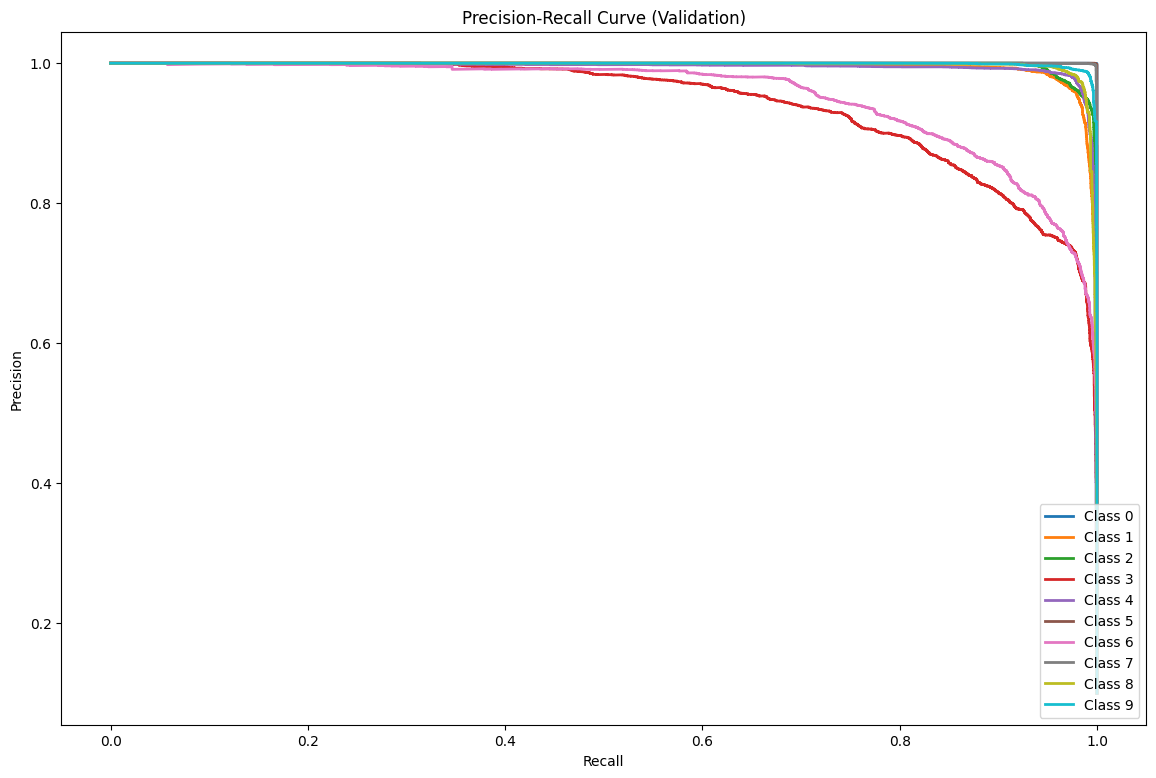


Metrics (Validation):
Accuracy: 96.082944%
Precision: 96.064881%
Recall: 96.078081%
F1 Score: 96.067213%
Loss: 0.113343
Elapsed Time: 10.30 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      3708
           1   0.982183  0.971216  0.976669      4030
           2   0.963509  0.977935  0.970669      3807
           3   0.852213  0.830126  0.841024      3897
           4   0.683099  0.960396  0.798354       202
           5   0.999763  0.997279  0.998520      8454
           6   0.866733  0.863299  0.865012      4038
           7   0.996247  0.999658  0.997949      2921
           8   0.972414  0.987000  0.979653      4000
           9   0.998340  0.989796  0.994050      3038

    accuracy                       0.959863     38095
   macro avg   0.931450  0.957670  0.942190     38095
weighted avg   0.960175  0.959863  0.959863     38095



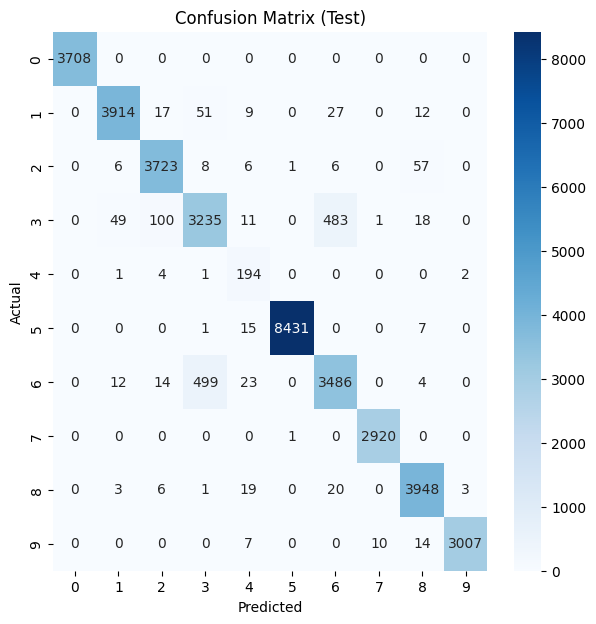

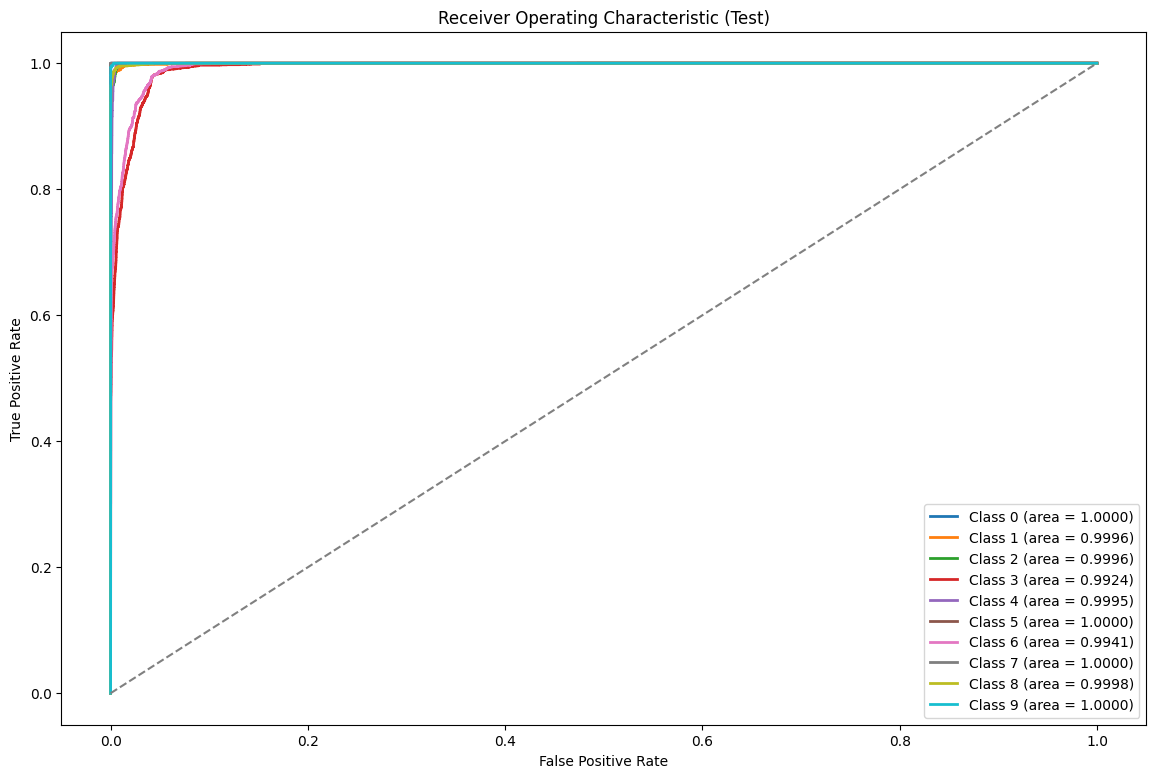

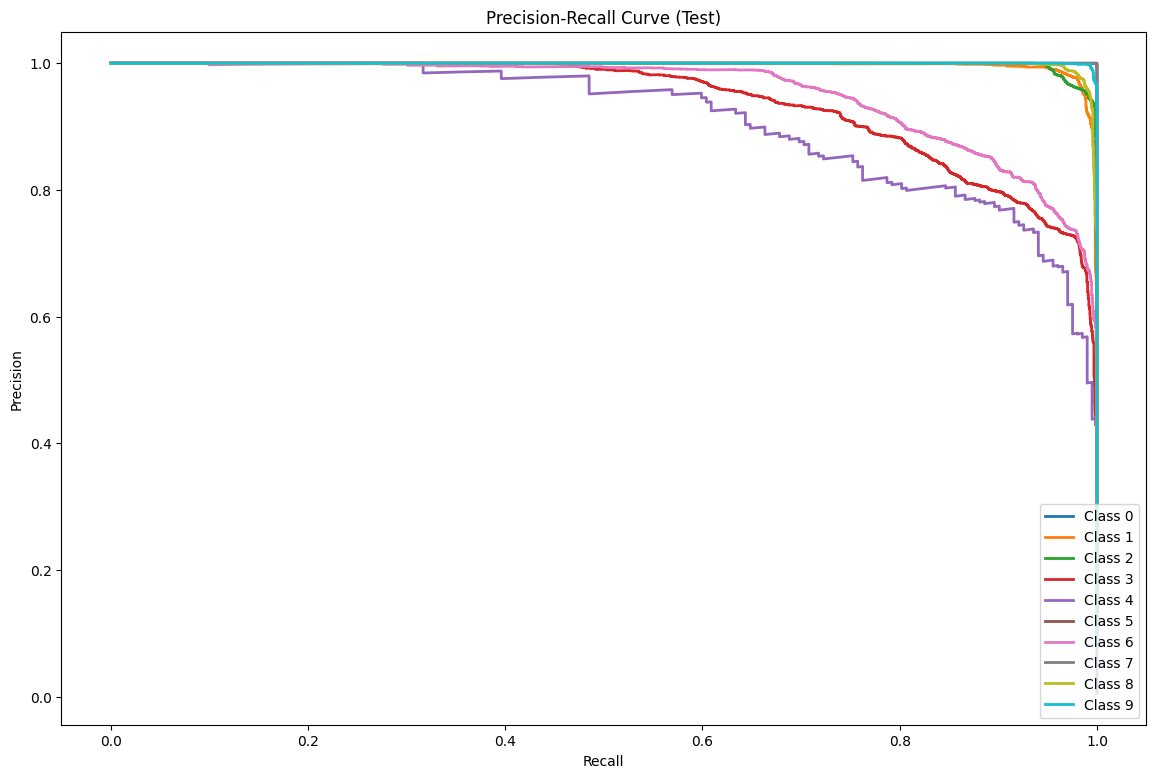


Metrics (Test):
Accuracy: 95.986350%
Precision: 93.145005%
Recall: 95.767047%
F1 Score: 94.218993%
Loss: 0.104948
Elapsed Time: 5.18 seconds


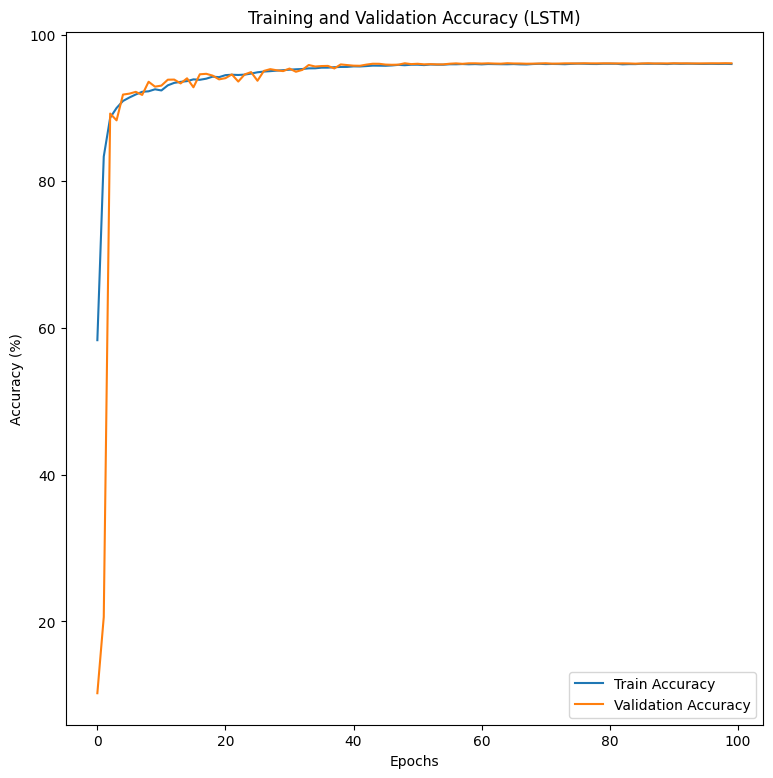

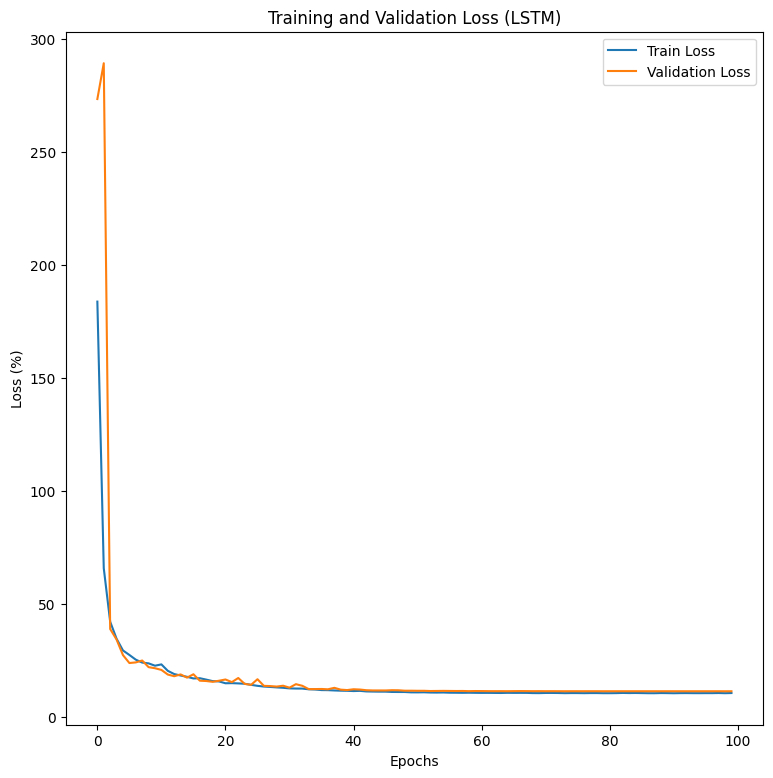

Epoch 1 - Train Loss: 183.7524%, Validation Loss: 273.39%, Train Accuracy: 58.34%, Validation Accuracy: 10.22%
Epoch 2 - Train Loss: 65.7851%, Validation Loss: 289.24%, Train Accuracy: 83.37%, Validation Accuracy: 20.61%
Epoch 3 - Train Loss: 42.1024%, Validation Loss: 38.88%, Train Accuracy: 88.67%, Validation Accuracy: 89.23%
Epoch 4 - Train Loss: 34.5654%, Validation Loss: 34.21%, Train Accuracy: 89.99%, Validation Accuracy: 88.31%
Epoch 5 - Train Loss: 29.3848%, Validation Loss: 27.33%, Train Accuracy: 90.95%, Validation Accuracy: 91.82%
Epoch 6 - Train Loss: 27.4006%, Validation Loss: 23.83%, Train Accuracy: 91.42%, Validation Accuracy: 91.95%
Epoch 7 - Train Loss: 25.3137%, Validation Loss: 24.10%, Train Accuracy: 91.84%, Validation Accuracy: 92.19%
Epoch 8 - Train Loss: 24.0238%, Validation Loss: 24.93%, Train Accuracy: 92.20%, Validation Accuracy: 91.77%
Epoch 9 - Train Loss: 23.6737%, Validation Loss: 22.00%, Train Accuracy: 92.27%, Validation Accuracy: 93.57%
Epoch 10 - Train

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import time


def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)

    # Classification report
    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()

    # Binarize the labels for ROC and precision-recall curve
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

    # ROC and AUC curves
    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-recall curves
    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

    # # Calculate classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")

# Label encoding for converting labels to integers
label_encoder = LabelEncoder()
y_TON_IOT_test2_encoded = label_encoder.fit_transform(y_TON_IOT_test2)

# Convert the encoded labels to one-hot encoding
y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2_encoded, num_classes=num_classes)

# Evaluate on the validation set
evaluate_model(model_lstm, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes, dataset_name="Validation")

# Evaluate on the test set
evaluate_model(model_lstm, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes, dataset_name="Test")

# Plot the learning curves
plt.figure(figsize=(9, 9))
plt.plot(np.array(history_lstm.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM)')
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
plt.plot(np.array(history_lstm.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()
plt.show()

## Display loss and accuracy for each epoch
for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm.history['loss'],
                                                                      history_lstm.history['val_loss'],
                                                                      history_lstm.history['accuracy'],
                                                                      history_lstm.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle
with open('history_lstm.pkl', 'wb') as file:
    pickle.dump(history_lstm.history, file)

#***GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_loss', save_best_only=True)


# GRU Model
model_gru = Sequential()
model_gru.add(GRU(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru.add(BatchNormalization())
model_gru.add(Dropout(0.5))
model_gru.add(Dense(10, activation='softmax'))

model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_gru = model_gru.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle GRU est de {training_time:.2f} secondes.")

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.2538 - loss: 2.8818 - val_accuracy: 0.1569 - val_loss: 2.5381 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7498 - loss: 0.8787 - val_accuracy: 0.4834 - val_loss: 2.1892 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.8866 - loss: 0.4006 - val_accuracy: 0.8429 - val_loss: 0.5151 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9056 - loss: 0.3173 - val_accuracy: 0.8980 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9130 - loss: 0.2784 - val_accuracy: 0.8954 - val_loss: 0.3129 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9205 - loss: 0.2516 - val_accuracy: 0.9052 - val_loss: 0.2902 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999530  0.999882  0.999706      8508
           1   0.977178  0.973821  0.975497      8442
           2   0.967519  0.976565  0.972021      8449
           3   0.877485  0.862829  0.870095      8442
           4   0.967974  0.983147  0.975501      8485
           5   0.997878  0.998349  0.998114      8480
           6   0.884890  0.889373  0.887126      8488
           7   0.999411  0.998236  0.998823      8504
           8   0.985493  0.977128  0.981293      8482
           9   0.992182  0.991008  0.991595      8452

    accuracy                       0.965078     84732
   macro avg   0.964954  0.965034  0.964977     84732
weighted avg   0.964992  0.965078  0.965018     84732



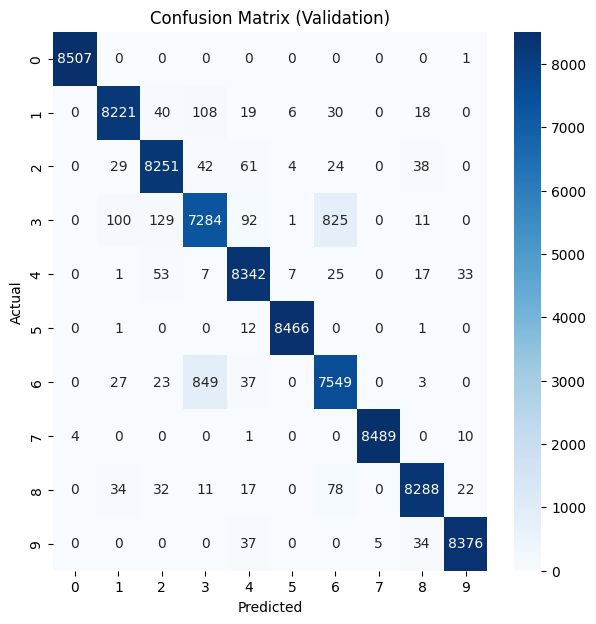

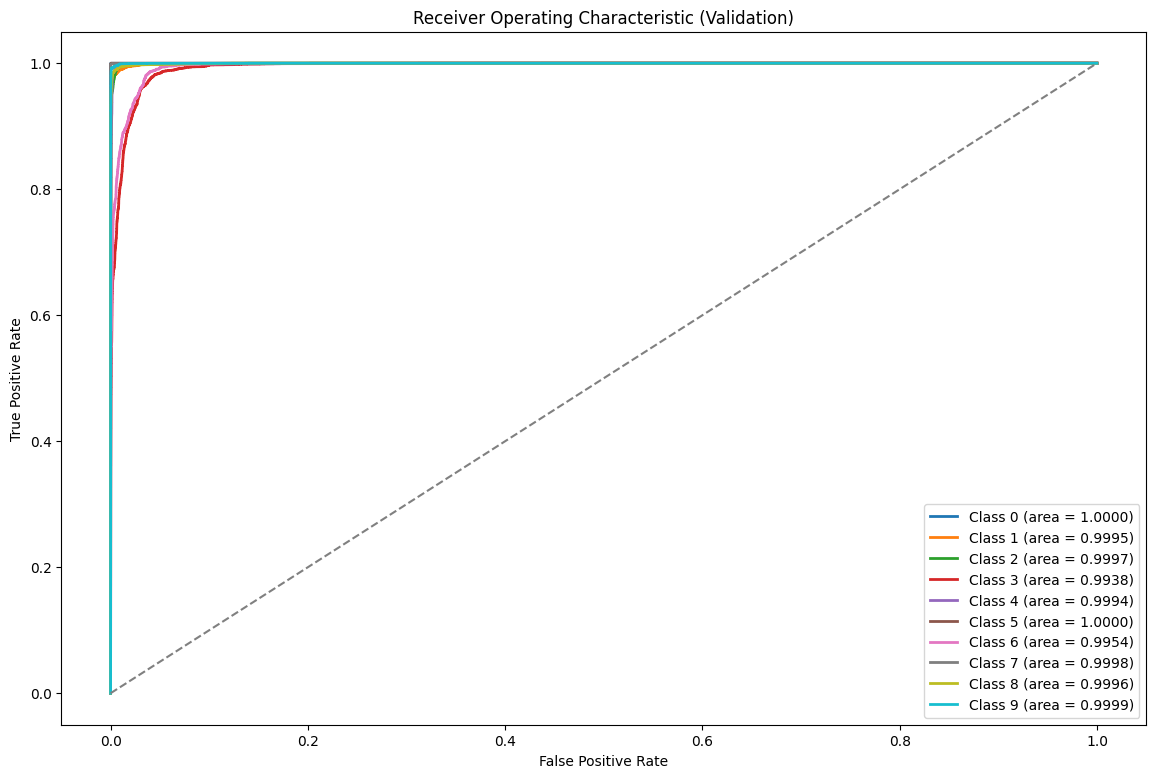

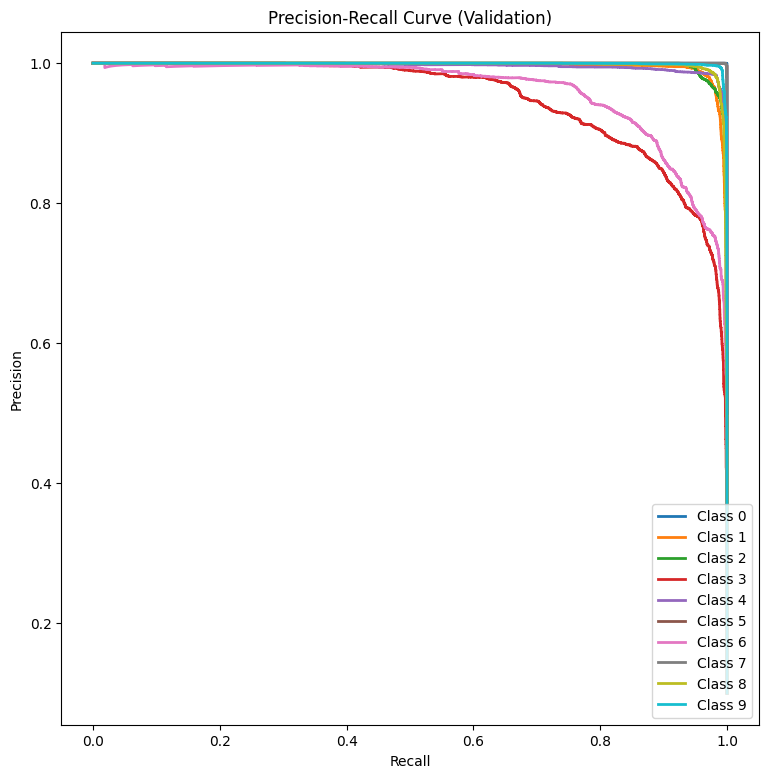


Metrics (Validation):
Accuracy: 96.507813%
Precision: 96.495411%
Recall: 96.503390%
F1 Score: 96.497712%
Loss: 0.103365
Elapsed Time: 8.53 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   0.999460  0.998652  0.999056      3708
           1   0.979582  0.976179  0.977877      4030
           2   0.972581  0.969004  0.970789      3807
           3   0.857217  0.850398  0.853794      3897
           4   0.539945  0.970297  0.693805       202
           5   0.999289  0.997753  0.998520      8454
           6   0.884343  0.867261  0.875719      4038
           7   0.996928  1.000000  0.998462      2921
           8   0.978115  0.983250  0.980676      4000
           9   0.998333  0.985846  0.992050      3038

    accuracy                       0.961334     38095
   macro avg   0.920579  0.959864  0.934075     38095
weighted avg   0.962918  0.961334  0.961786     38095



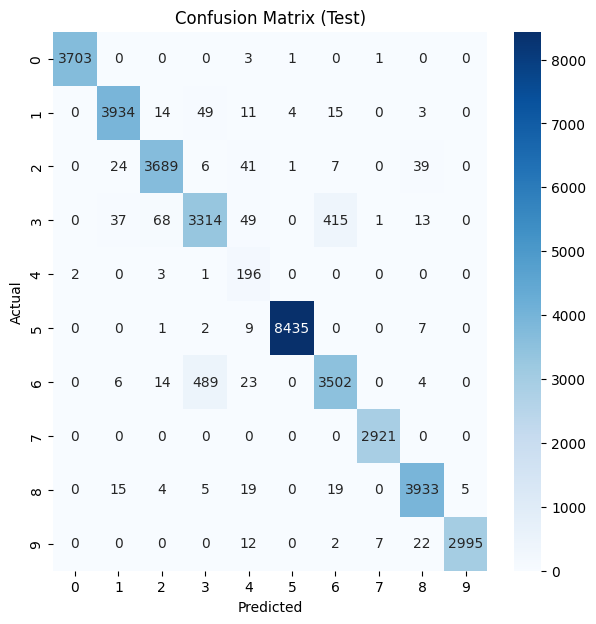

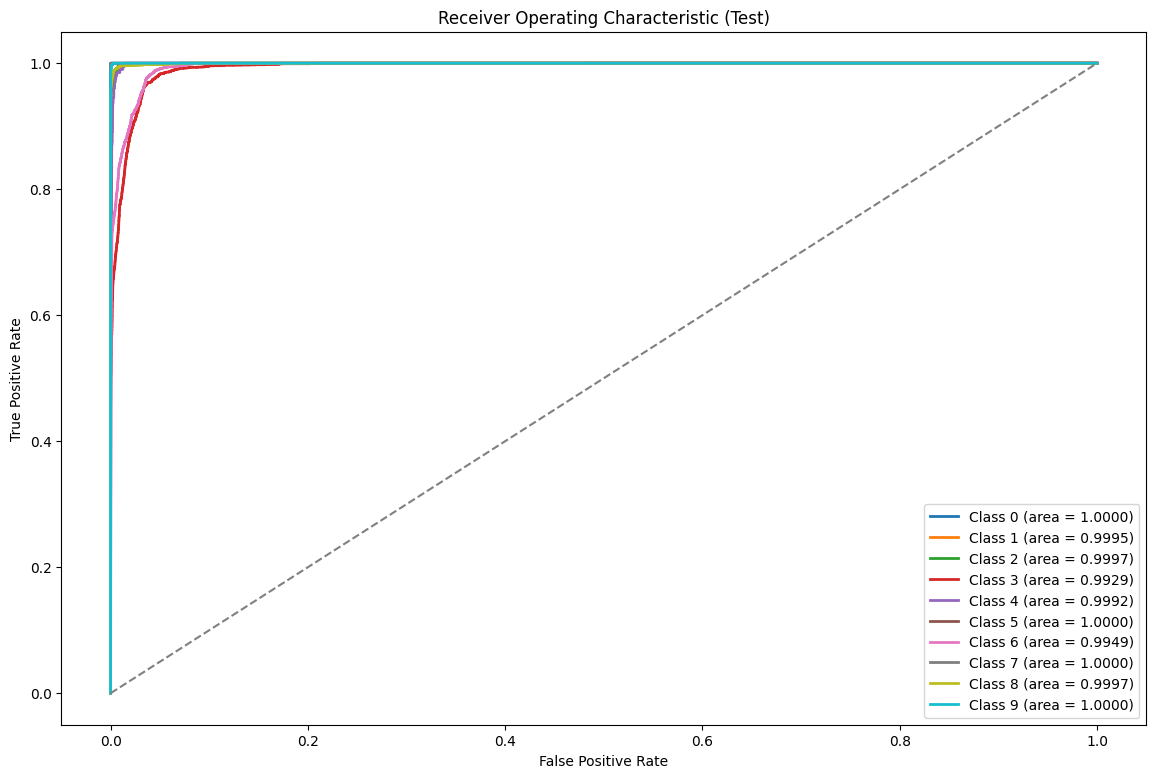

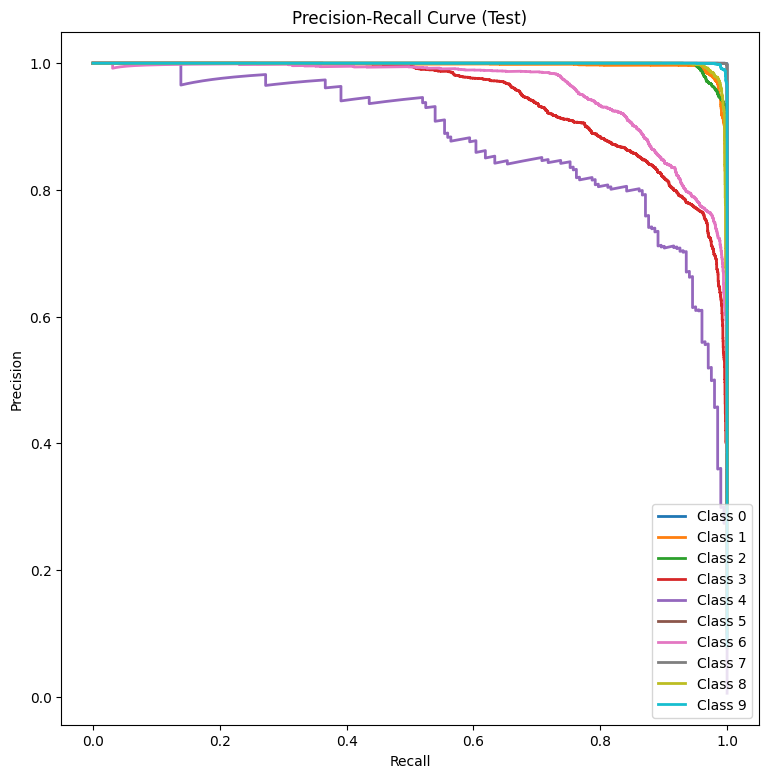


Metrics (Test):
Accuracy: 96.133351%
Precision: 92.057938%
Recall: 95.986390%
F1 Score: 93.407484%
Loss: 0.103278
Elapsed Time: 3.61 seconds


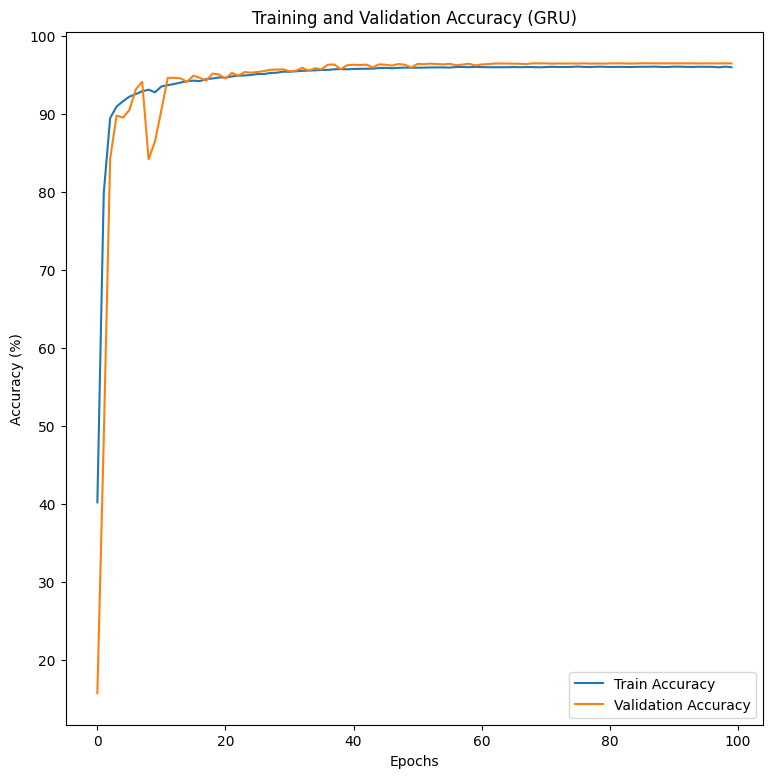

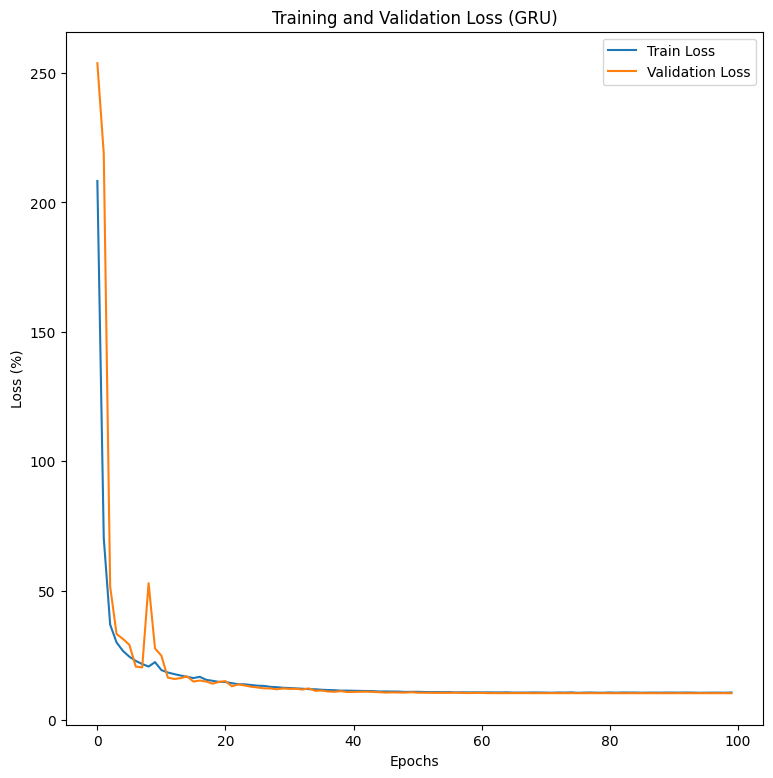

Epoch 1 - Train Loss: 208.3129%, Validation Loss: 253.81%, Train Accuracy: 40.18%, Validation Accuracy: 15.69%
Epoch 2 - Train Loss: 70.2790%, Validation Loss: 218.92%, Train Accuracy: 79.91%, Validation Accuracy: 48.34%
Epoch 3 - Train Loss: 36.8228%, Validation Loss: 51.51%, Train Accuracy: 89.49%, Validation Accuracy: 84.29%
Epoch 4 - Train Loss: 29.9501%, Validation Loss: 33.21%, Train Accuracy: 90.97%, Validation Accuracy: 89.80%
Epoch 5 - Train Loss: 26.6802%, Validation Loss: 31.29%, Train Accuracy: 91.64%, Validation Accuracy: 89.54%
Epoch 6 - Train Loss: 24.4343%, Validation Loss: 29.02%, Train Accuracy: 92.23%, Validation Accuracy: 90.52%
Epoch 7 - Train Loss: 22.8059%, Validation Loss: 20.61%, Train Accuracy: 92.56%, Validation Accuracy: 93.17%
Epoch 8 - Train Loss: 21.6143%, Validation Loss: 20.31%, Train Accuracy: 92.93%, Validation Accuracy: 94.13%
Epoch 9 - Train Loss: 20.6409%, Validation Loss: 52.84%, Train Accuracy: 93.13%, Validation Accuracy: 84.21%
Epoch 10 - Train

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize, LabelEncoder


label_encoder = LabelEncoder()
y_TON_IOT_test2_encoded = label_encoder.fit_transform(y_TON_IOT_test2)


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2_encoded, num_classes=10)
import time


def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)


    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))


    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()


    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))


    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    plt.figure(figsize=(9, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")


label_encoder = LabelEncoder()
y_TON_IOT_test2_encoded = label_encoder.fit_transform(y_TON_IOT_test2)



y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2_encoded, num_classes=10)


evaluate_model(model_gru, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes=10, dataset_name="Validation")

evaluate_model(model_gru, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes=10, dataset_name="Test")


plt.figure(figsize=(9, 9))
plt.plot(np.array(history_gru.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
plt.plot(np.array(history_gru.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU)')
plt.legend()
plt.show()




for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru.history['loss'],
                                                                      history_gru.history['val_loss'],
                                                                      history_gru.history['accuracy'],
                                                                      history_gru.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle
with open('history_gru.pkl', 'wb') as file:
    pickle.dump(history_gru.history, file)

 # ***RNN***


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_loss', save_best_only=True)

#RNN Model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=X_TON_IOT_train.shape[1:], kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn.add(BatchNormalization())
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(10, activation='softmax'))

model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_rnn = model_rnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                            validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                            callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time


 # training_time
print(f"Le temps d'entraînement du modèle SimpleRNN est de {training_time:.2f} secondes.")

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.7068 - loss: 2.1572 - val_accuracy: 0.8960 - val_loss: 0.4364 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9062 - loss: 0.3639 - val_accuracy: 0.8960 - val_loss: 0.3009 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9159 - loss: 0.2729 - val_accuracy: 0.9319 - val_loss: 0.2061 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9266 - loss: 0.2330 - val_accuracy: 0.9286 - val_loss: 0.2278 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9310 - loss: 0.2155 - val_accuracy: 0.9272 - val_loss: 0.2141 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9323 - loss: 0.2060 - val_accuracy: 0.9409 - val_loss: 0.1789 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.917

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999765  0.999765  0.999765      8508
           1   0.981006  0.972755  0.976863      8442
           2   0.960139  0.980708  0.970314      8449
           3   0.864501  0.888770  0.876467      8442
           4   0.981709  0.980436  0.981072      8485
           5   0.998821  0.999292  0.999057      8480
           6   0.907740  0.870523  0.888742      8488
           7   0.998941  0.998119  0.998529      8504
           8   0.986195  0.985381  0.985788      8482
           9   0.991267  0.993848  0.992556      8452

    accuracy                       0.966990     84732
   macro avg   0.967008  0.966960  0.966915     84732
weighted avg   0.967058  0.966990  0.966955     84732



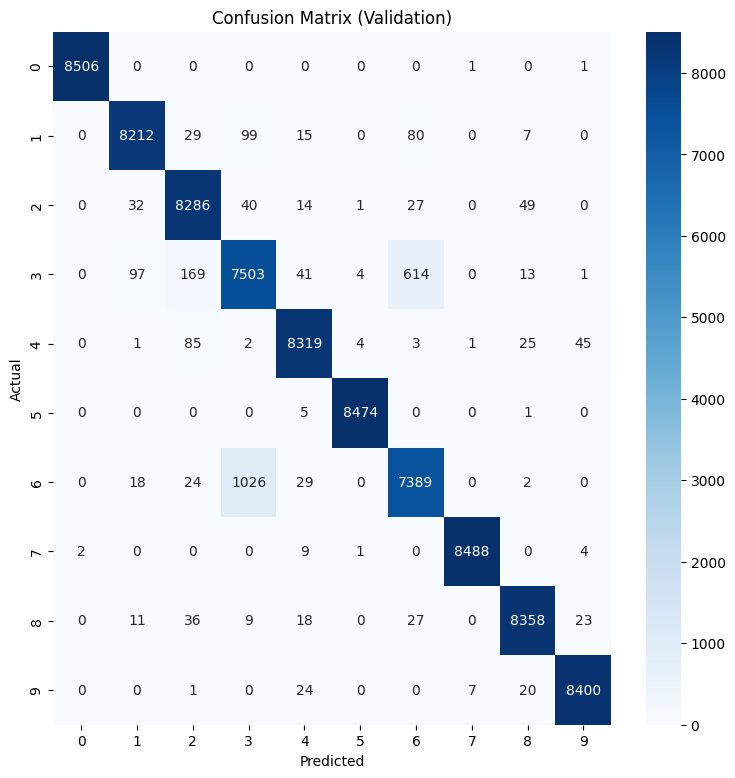

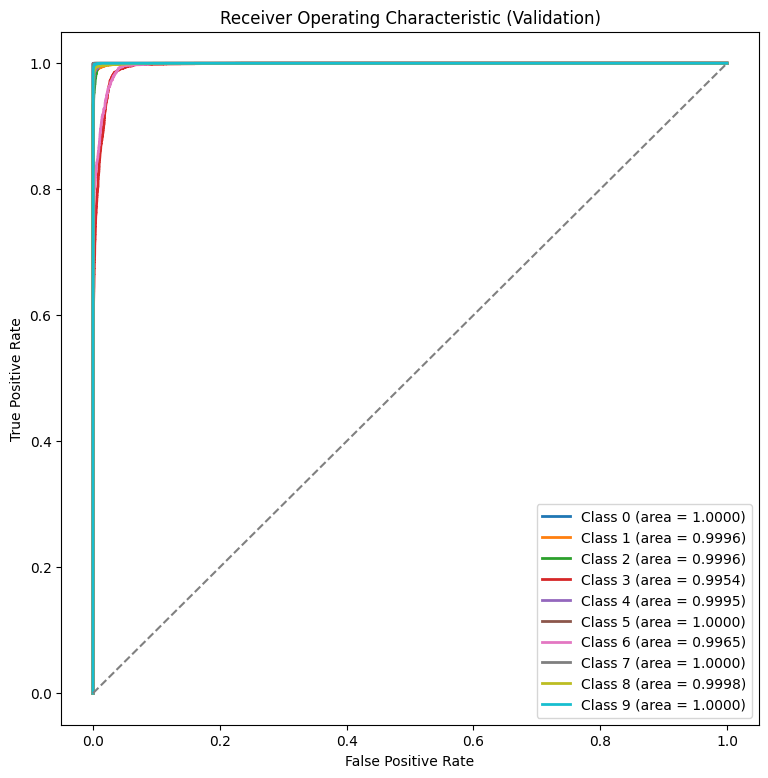

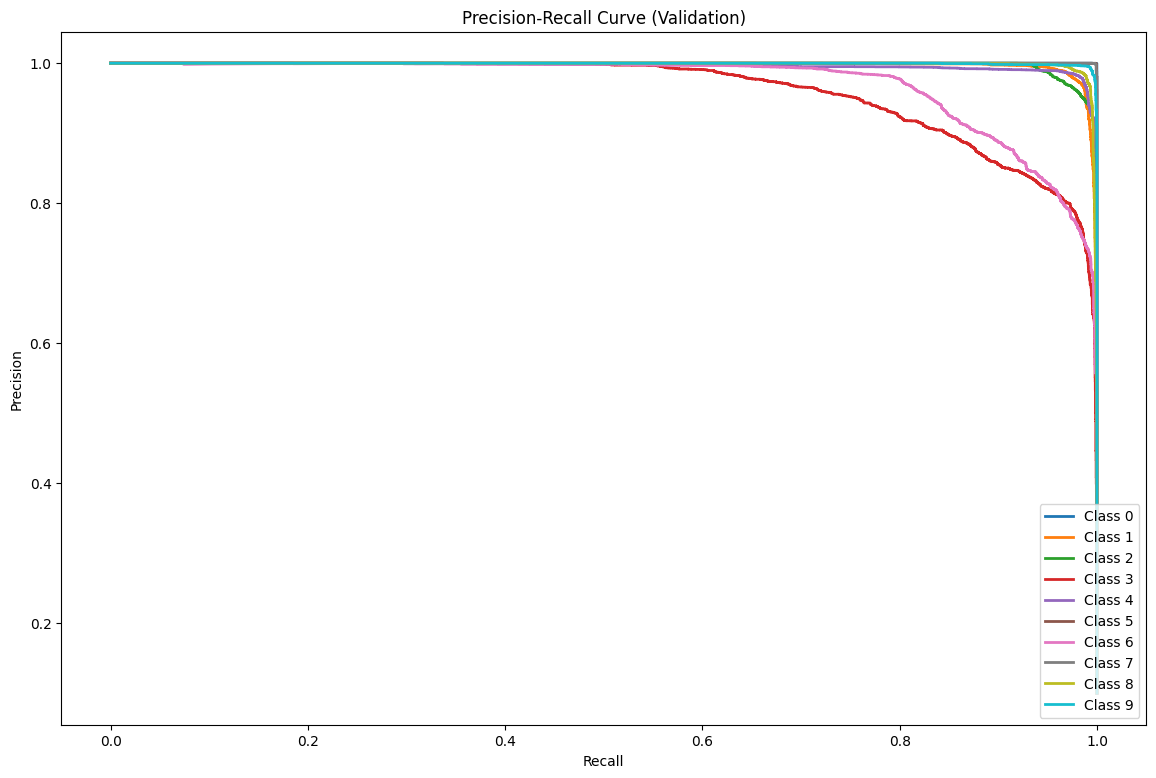


Metrics (Validation):
Accuracy: 96.699004%
Precision: 96.700829%
Recall: 96.695970%
F1 Score: 96.691536%
Loss: 0.086704
Elapsed Time: 20.57 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   0.999730  0.998112  0.998920      3708
           1   0.988622  0.970223  0.979336      4030
           2   0.964443  0.976097  0.970235      3807
           3   0.850890  0.882987  0.866641      3897
           4   0.667832  0.945545  0.782787       202
           5   0.999645  0.998935  0.999290      8454
           6   0.910142  0.857850  0.883223      4038
           7   0.997950  1.000000  0.998974      2921
           8   0.979223  0.989750  0.984459      4000
           9   0.996041  0.993746  0.994892      3038

    accuracy                       0.965140     38095
   macro avg   0.935452  0.961325  0.945876     38095
weighted avg   0.965944  0.965140  0.965287     38095



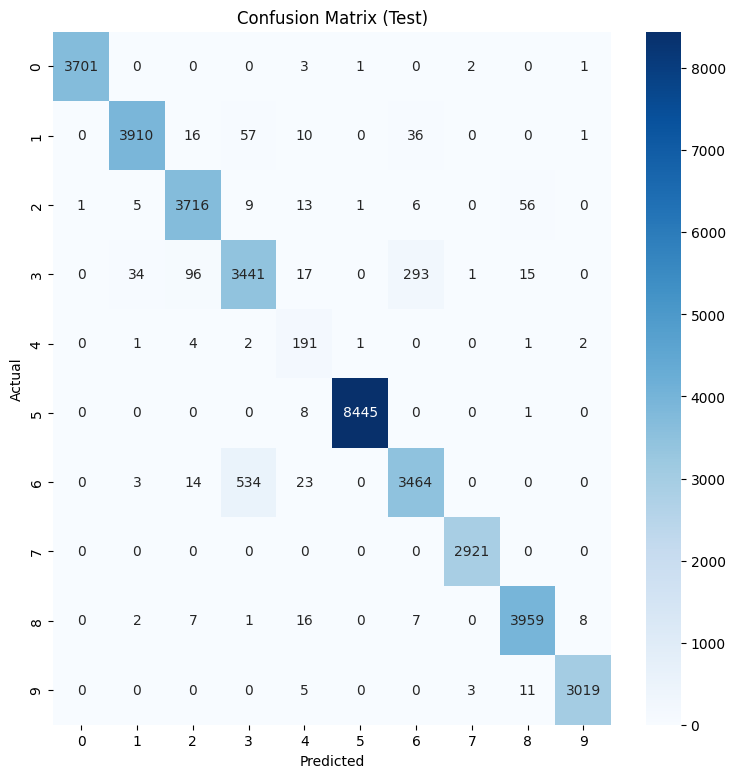

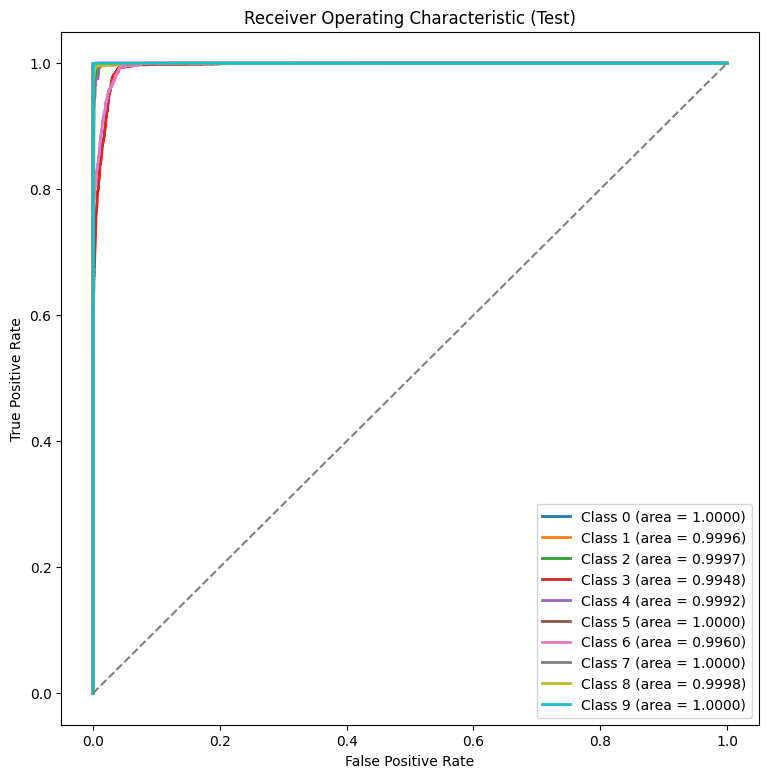

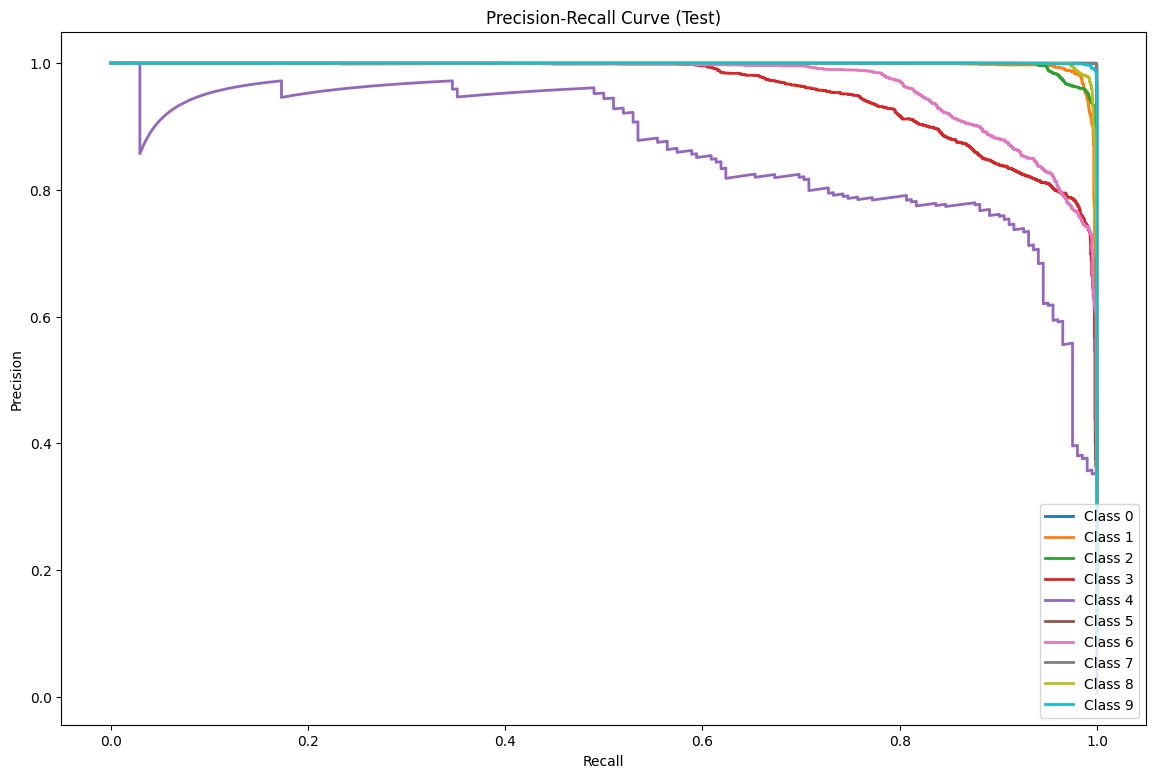


Metrics (Test):
Accuracy: 96.513978%
Precision: 93.545187%
Recall: 96.132454%
F1 Score: 94.587575%
Loss: 0.085980
Elapsed Time: 5.58 seconds


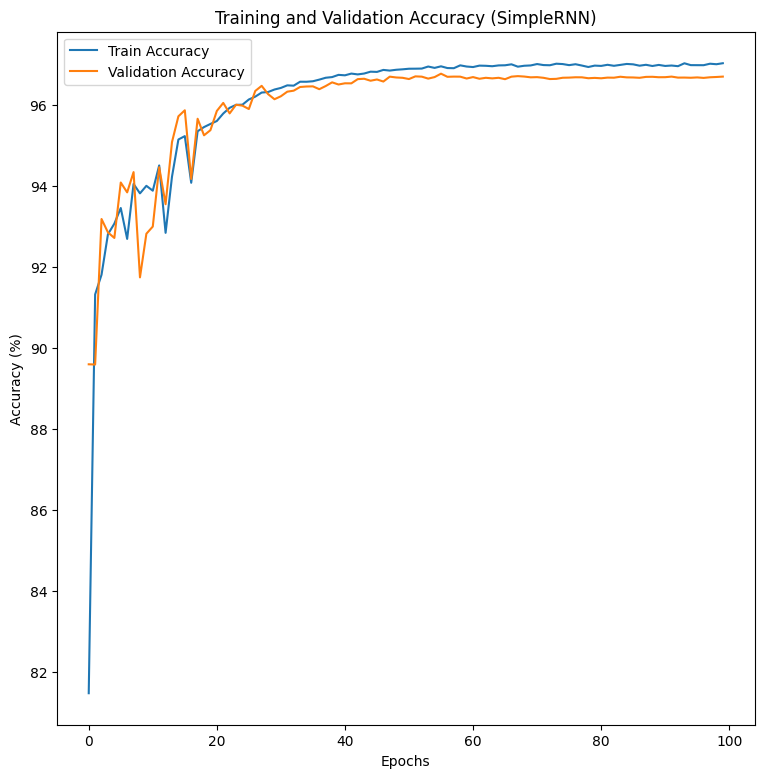

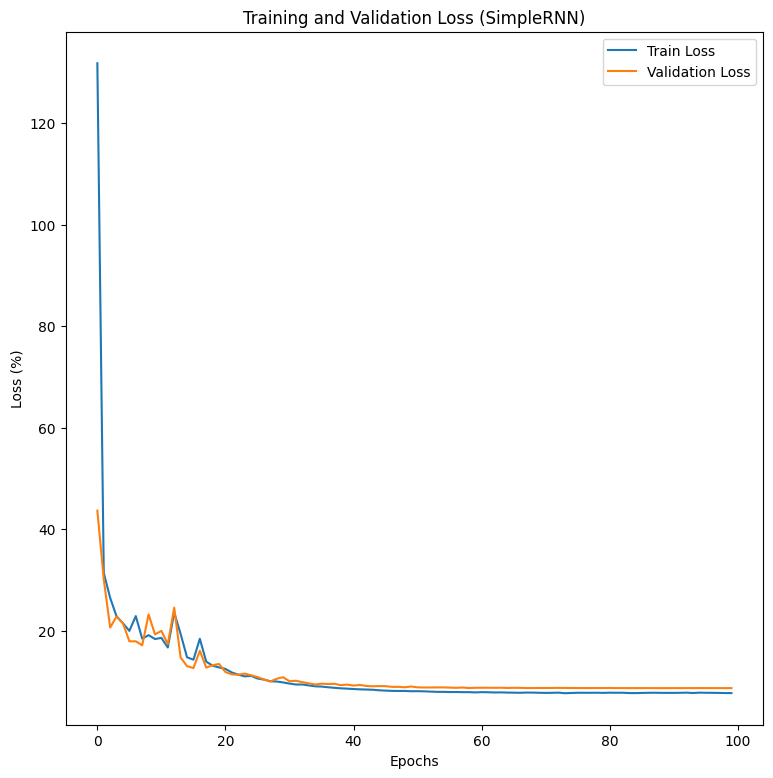

Epoch 1 - Train Loss: 131.8090%, Validation Loss: 43.64%, Train Accuracy: 81.49%, Validation Accuracy: 89.60%
Epoch 2 - Train Loss: 31.3787%, Validation Loss: 30.09%, Train Accuracy: 91.33%, Validation Accuracy: 89.60%
Epoch 3 - Train Loss: 26.4529%, Validation Loss: 20.61%, Train Accuracy: 91.81%, Validation Accuracy: 93.19%
Epoch 4 - Train Loss: 22.8026%, Validation Loss: 22.78%, Train Accuracy: 92.81%, Validation Accuracy: 92.86%
Epoch 5 - Train Loss: 21.4438%, Validation Loss: 21.41%, Train Accuracy: 93.07%, Validation Accuracy: 92.72%
Epoch 6 - Train Loss: 19.9460%, Validation Loss: 17.89%, Train Accuracy: 93.46%, Validation Accuracy: 94.09%
Epoch 7 - Train Loss: 22.8663%, Validation Loss: 17.89%, Train Accuracy: 92.70%, Validation Accuracy: 93.84%
Epoch 8 - Train Loss: 18.4087%, Validation Loss: 17.10%, Train Accuracy: 94.05%, Validation Accuracy: 94.34%
Epoch 9 - Train Loss: 19.1063%, Validation Loss: 23.18%, Train Accuracy: 93.82%, Validation Accuracy: 91.75%
Epoch 10 - Train L

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns




def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)


    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))


    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()


    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))


    plt.figure(figsize=(9, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")


evaluate_model(model_rnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes=10, dataset_name="Validation")
evaluate_model(model_rnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes=10, dataset_name="Test")


plt.figure(figsize=(9, 9))
plt.plot(np.array(history_rnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN)')
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
plt.plot(np.array(history_rnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN)')
plt.legend()
plt.show()


for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn.history['loss'],
                                                                      history_rnn.history['val_loss'],
                                                                      history_rnn.history['accuracy'],
                                                                      history_rnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle
with open('history_rnn.pkl', 'wb') as file:
    pickle.dump(history_rnn.history, file)

 # ***CNN_LSTM***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns
import time
import numpy as np


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_loss', save_best_only=True)


# CNN_LSTM Model definition
model_lstm_cnn = Sequential()

#
model_lstm_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))
model_lstm_cnn.add(Conv1D(128, 3, activation='relu'))
model_lstm_cnn.add(MaxPooling1D(pool_size=2))


model_lstm_cnn.add(LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(LSTM(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_lstm_cnn.add(BatchNormalization())
model_lstm_cnn.add(Dropout(0.5))
model_lstm_cnn.add(Flatten())
model_lstm_cnn.add(Dense(10, activation='softmax'))

model_lstm_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

history_lstm_cnn = model_lstm_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                      validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                      callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time

 # training_time
print(f"Le temps d'entraînement du modèle LSTM_CNN est de {training_time:.2f} secondes.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.7604 - loss: 2.7814 - val_accuracy: 0.2776 - val_loss: 2.2661 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9154 - loss: 0.4651 - val_accuracy: 0.6431 - val_loss: 1.0746 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9224 - loss: 0.3152 - val_accuracy: 0.8836 - val_loss: 0.3518 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9319 - loss: 0.2462 - val_accuracy: 0.7695 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9335 - loss: 0.2243 - val_accuracy: 0.7939 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9351 - loss: 0.2093 - val_accuracy: 0.9011 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.938

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999765  1.000000  0.999882      8508
           1   0.981350  0.984838  0.983091      8442
           2   0.965200  0.981536  0.973300      8449
           3   0.960332  0.946340  0.953284      8442
           4   0.976252  0.978668  0.977459      8485
           5   0.999174  0.997995  0.998584      8480
           6   0.973756  0.961711  0.967696      8488
           7   0.999176  0.998119  0.998647      8504
           8   0.983149  0.983612  0.983380      8482
           9   0.986587  0.992073  0.989322      8452

    accuracy                       0.982510     84732
   macro avg   0.982474  0.982489  0.982465     84732
weighted avg   0.982499  0.982510  0.982487     84732



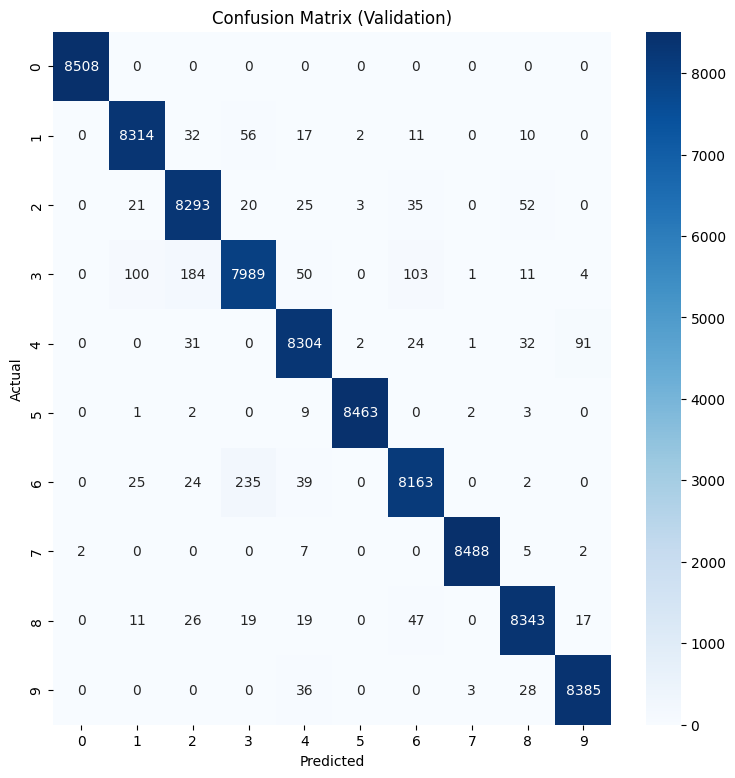

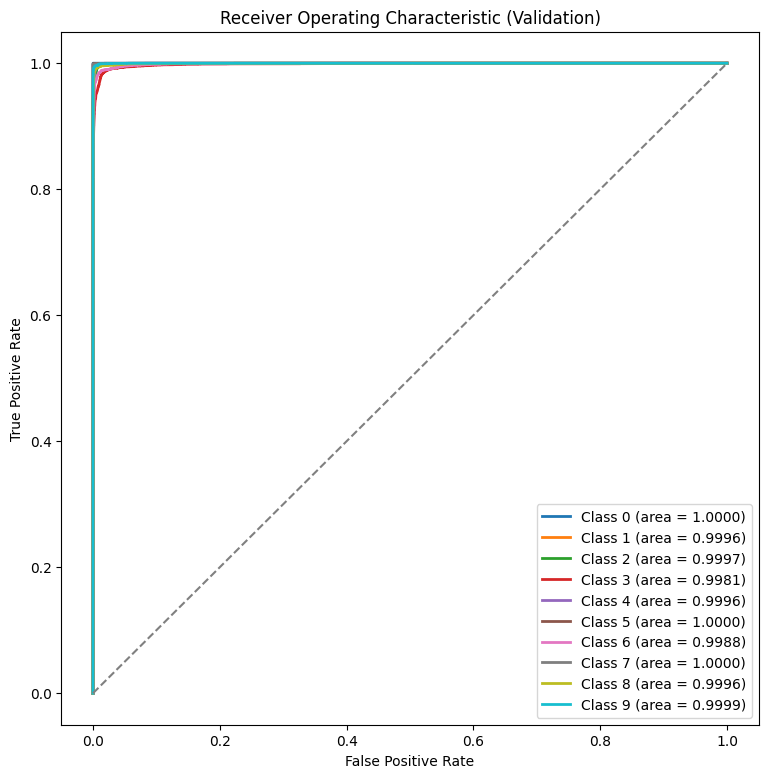

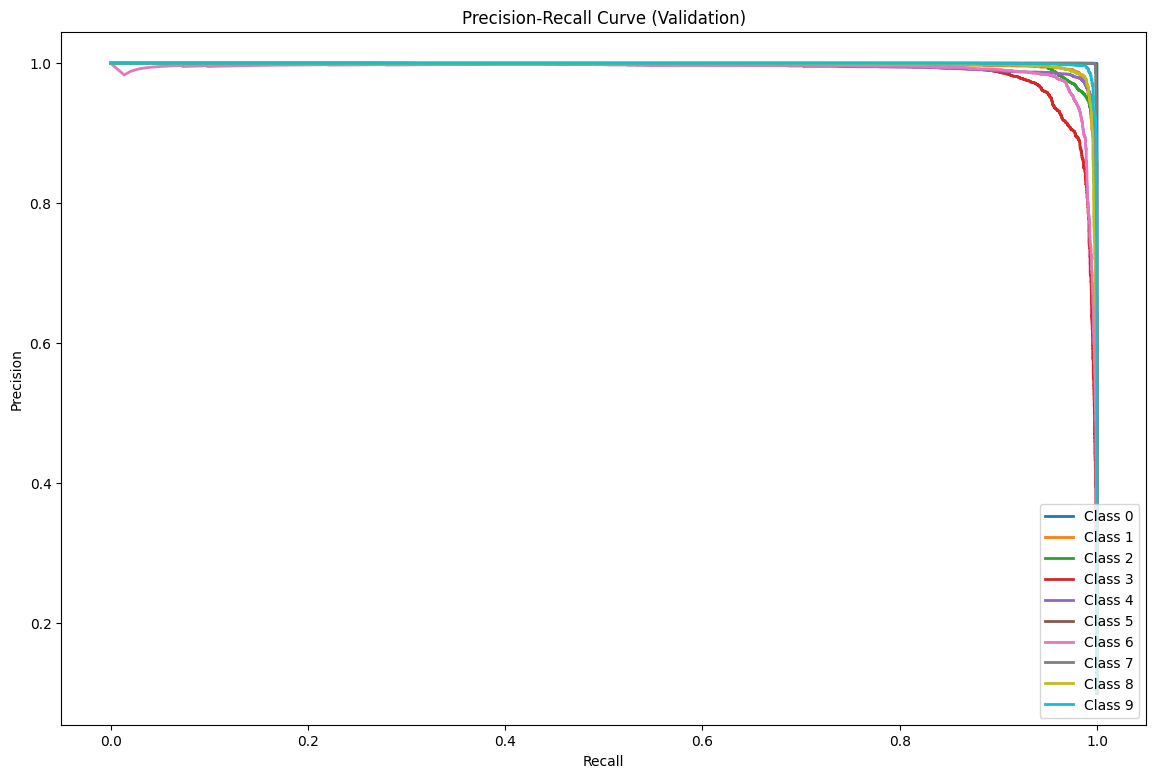


Metrics (Validation):
Accuracy: 98.250956%
Precision: 98.247407%
Recall: 98.248917%
F1 Score: 98.246459%
Loss: 0.068950
Elapsed Time: 8.26 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   0.999730  0.998382  0.999055      3708
           1   0.987042  0.982878  0.984956      4030
           2   0.962157  0.975046  0.968558      3807
           3   0.968183  0.944829  0.956364      3897
           4   0.633663  0.950495  0.760396       202
           5   0.999763  0.997161  0.998460      8454
           6   0.982650  0.967806  0.975172      4038
           7   0.996246  0.999315  0.997778      2921
           8   0.974163  0.989750  0.981895      4000
           9   0.997676  0.989138  0.993388      3038

    accuracy                       0.983594     38095
   macro avg   0.950127  0.979480  0.961602     38095
weighted avg   0.984546  0.983594  0.983868     38095



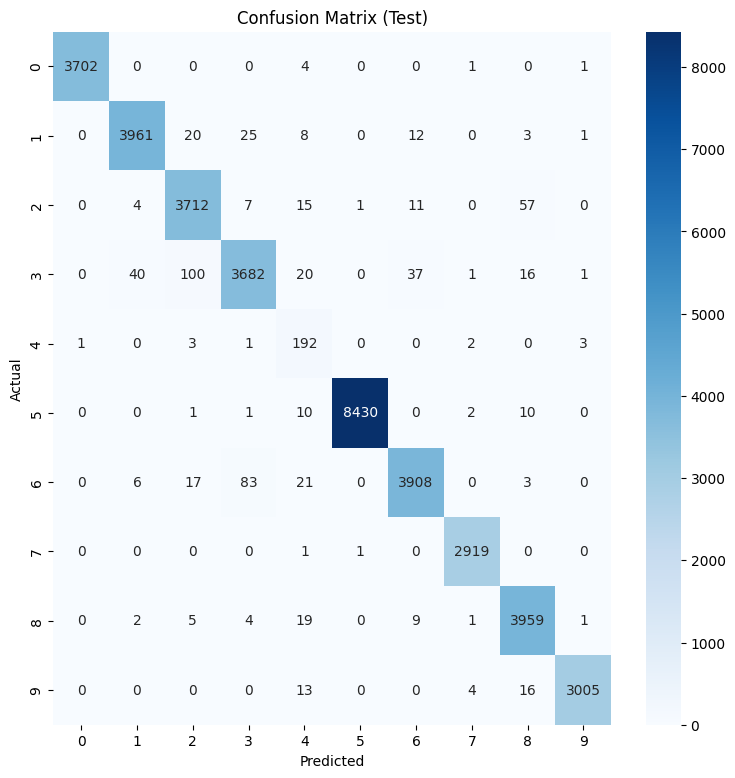

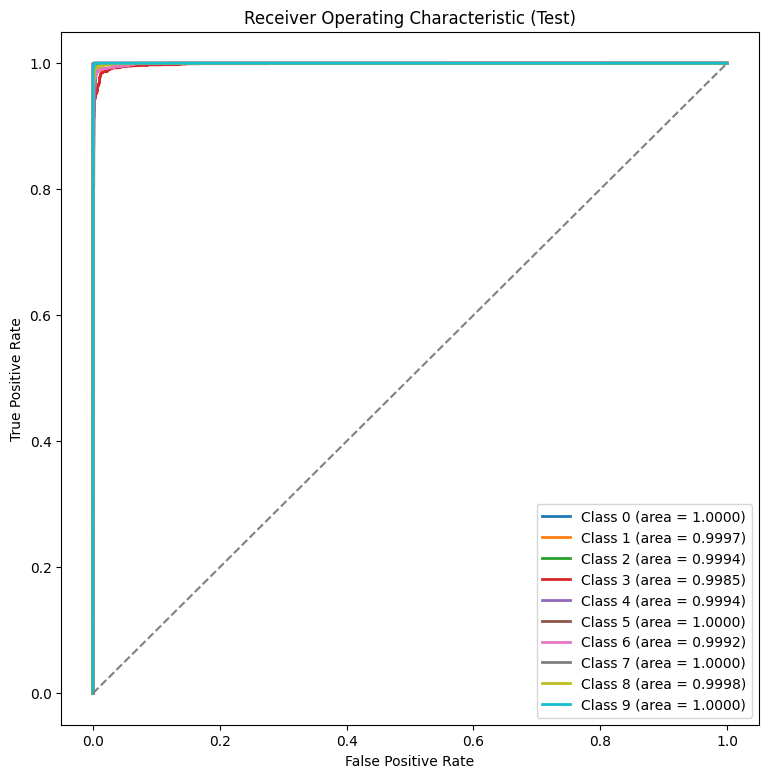

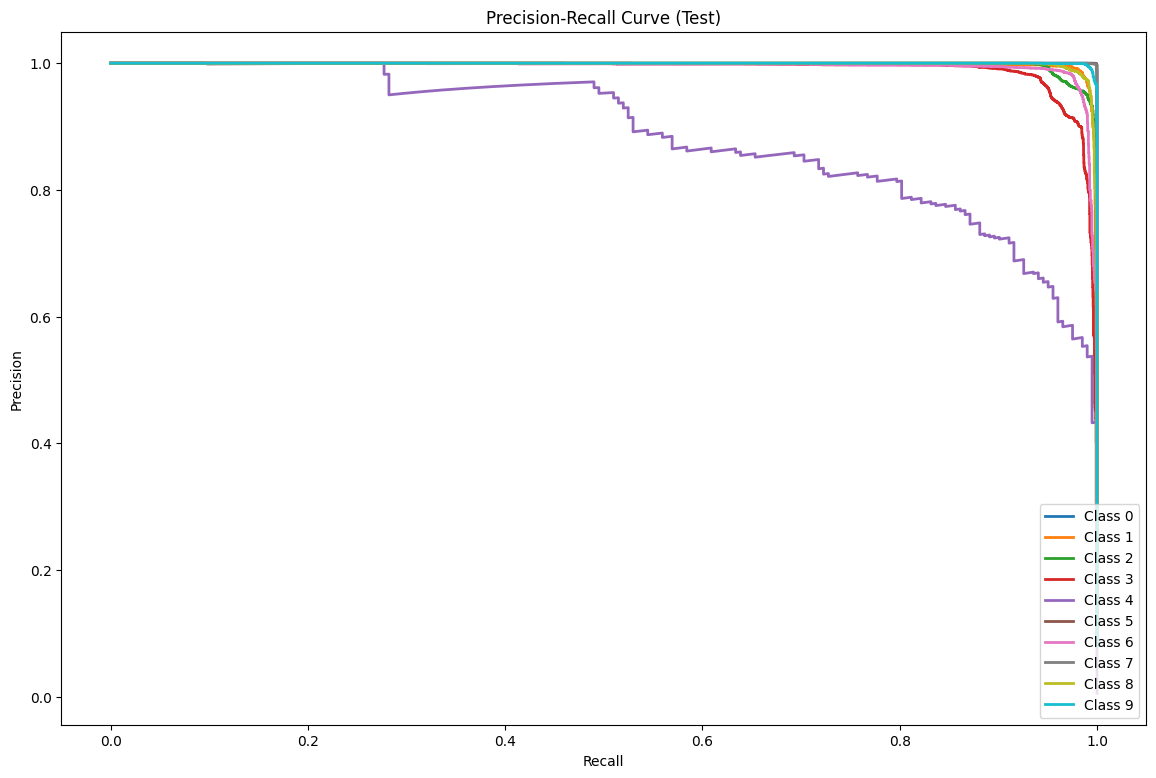


Metrics (Test):
Accuracy: 98.359365%
Precision: 95.012731%
Recall: 97.948005%
F1 Score: 96.160226%
Loss: 0.063276
Elapsed Time: 3.56 seconds


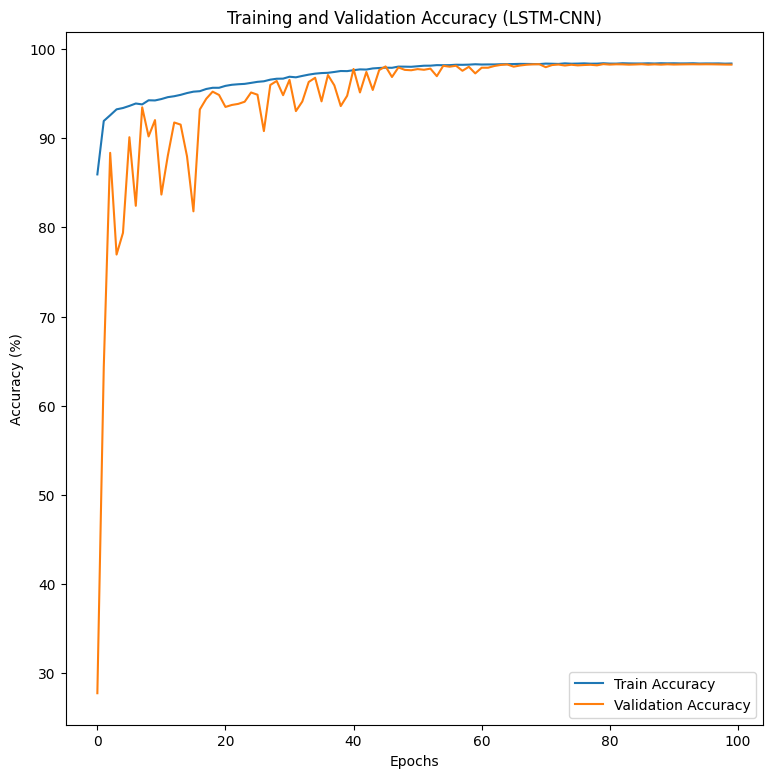

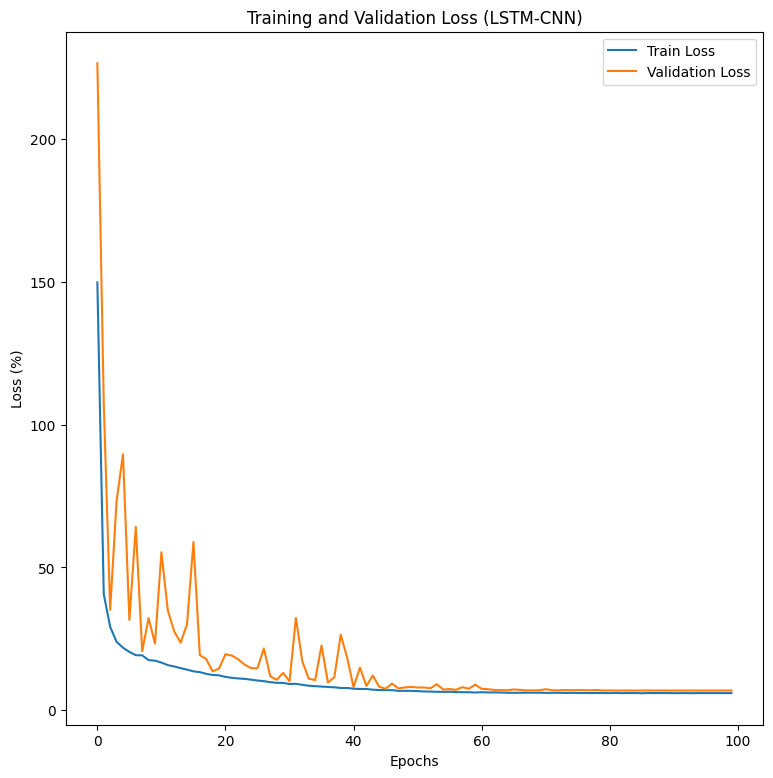

Epoch 1 - Train Loss: 149.8732%, Validation Loss: 226.61%, Train Accuracy: 85.94%, Validation Accuracy: 27.76%
Epoch 2 - Train Loss: 40.6511%, Validation Loss: 107.46%, Train Accuracy: 91.93%, Validation Accuracy: 64.31%
Epoch 3 - Train Loss: 29.1942%, Validation Loss: 35.18%, Train Accuracy: 92.57%, Validation Accuracy: 88.36%
Epoch 4 - Train Loss: 23.9524%, Validation Loss: 73.24%, Train Accuracy: 93.23%, Validation Accuracy: 76.95%
Epoch 5 - Train Loss: 21.9005%, Validation Loss: 89.65%, Train Accuracy: 93.38%, Validation Accuracy: 79.39%
Epoch 6 - Train Loss: 20.4275%, Validation Loss: 31.64%, Train Accuracy: 93.62%, Validation Accuracy: 90.11%
Epoch 7 - Train Loss: 19.2654%, Validation Loss: 64.23%, Train Accuracy: 93.89%, Validation Accuracy: 82.42%
Epoch 8 - Train Loss: 19.2219%, Validation Loss: 20.66%, Train Accuracy: 93.79%, Validation Accuracy: 93.46%
Epoch 9 - Train Loss: 17.5464%, Validation Loss: 32.29%, Train Accuracy: 94.25%, Validation Accuracy: 90.20%
Epoch 10 - Train

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import label_binarize, LabelEncoder



def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)


    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))


    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()


    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))


    plt.figure(figsize=(9, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")

label_encoder = LabelEncoder()
y_TON_IOT_test2_encoded = label_encoder.fit_transform(y_TON_IOT_test2)


y_TON_IOT_test2_one_hot = tf.keras.utils.to_categorical(y_TON_IOT_test2_encoded, num_classes=10)

evaluate_model(model_lstm_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes=10, dataset_name="Validation")
evaluate_model(model_lstm_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes=10, dataset_name="Test")


plt.figure(figsize=(9, 9))
plt.plot(np.array(history_lstm_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_lstm_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (LSTM-CNN)')
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
plt.plot(np.array(history_lstm_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_lstm_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (LSTM-CNN)')
plt.legend()
plt.show()




for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_lstm_cnn.history['loss'],
                                                                      history_lstm_cnn.history['val_loss'],
                                                                      history_lstm_cnn.history['accuracy'],
                                                                      history_lstm_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")


In [ ]:
import pickle
with open('history_lstm_cnn.pkl', 'wb') as file:
    pickle.dump(history_lstm_cnn.history, file)

# ***CNN_GRU***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#CNN_GRU Model
model_gru_cnn = Sequential()
model_gru_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(Conv1D(128, 3, activation='relu'))
model_gru_cnn.add(MaxPooling1D(pool_size=2))
model_gru_cnn.add(GRU(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(GRU(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_gru_cnn.add(BatchNormalization())
model_gru_cnn.add(Dropout(0.5))
model_gru_cnn.add(Flatten())
model_gru_cnn.add(Dense(10, activation='softmax'))

model_gru_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


start_time = time.time()


history_gru_cnn = model_gru_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time



# training_time
print(f"Le temps d'entraînement du modèle CNN_GRU est de {training_time:.2f} secondes.")


Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6442 - loss: 3.1522 - val_accuracy: 0.2310 - val_loss: 2.3346 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9101 - loss: 0.4963 - val_accuracy: 0.4870 - val_loss: 1.3111 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9203 - loss: 0.3254 - val_accuracy: 0.6518 - val_loss: 1.5277 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9246 - loss: 0.2679 - val_accuracy: 0.8056 - val_loss: 0.8383 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9270 - loss: 0.2458 - val_accuracy: 0.6977 - val_loss: 2.1681 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9320 - loss: 0.2211 - val_accuracy: 0.8886 - val_loss: 0.4214 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9347

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999530  0.999882  0.999706      8508
           1   0.978726  0.980929  0.979826      8442
           2   0.965135  0.979643  0.972335      8449
           3   0.974465  0.944800  0.959403      8442
           4   0.969538  0.979022  0.974257      8485
           5   0.995763  0.997759  0.996760      8480
           6   0.976514  0.974788  0.975650      8488
           7   0.999176  0.998001  0.998588      8504
           8   0.982004  0.984320  0.983161      8482
           9   0.990077  0.991600  0.990838      8452

    accuracy                       0.983100     84732
   macro avg   0.983093  0.983074  0.983052     84732
weighted avg   0.983111  0.983100  0.983074     84732



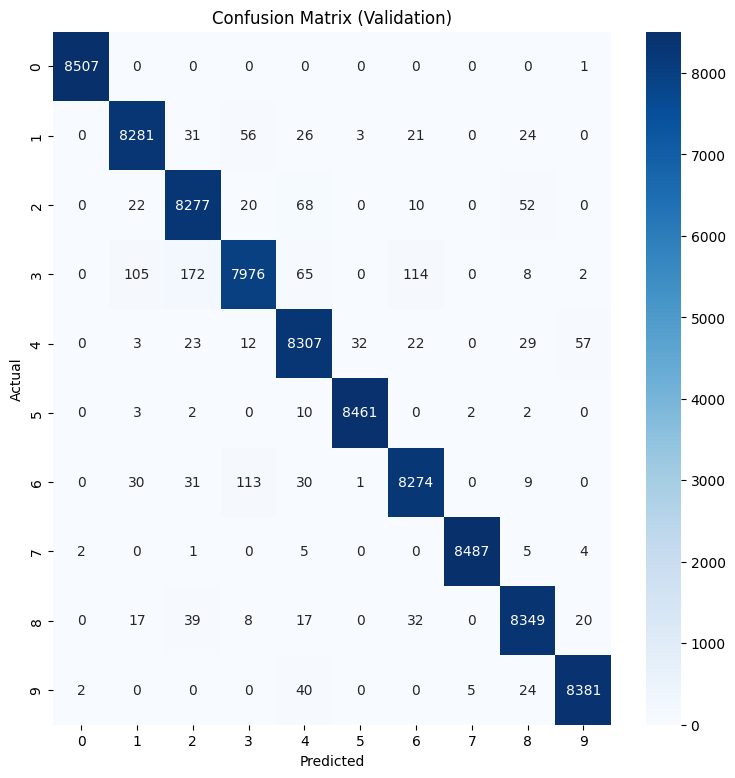

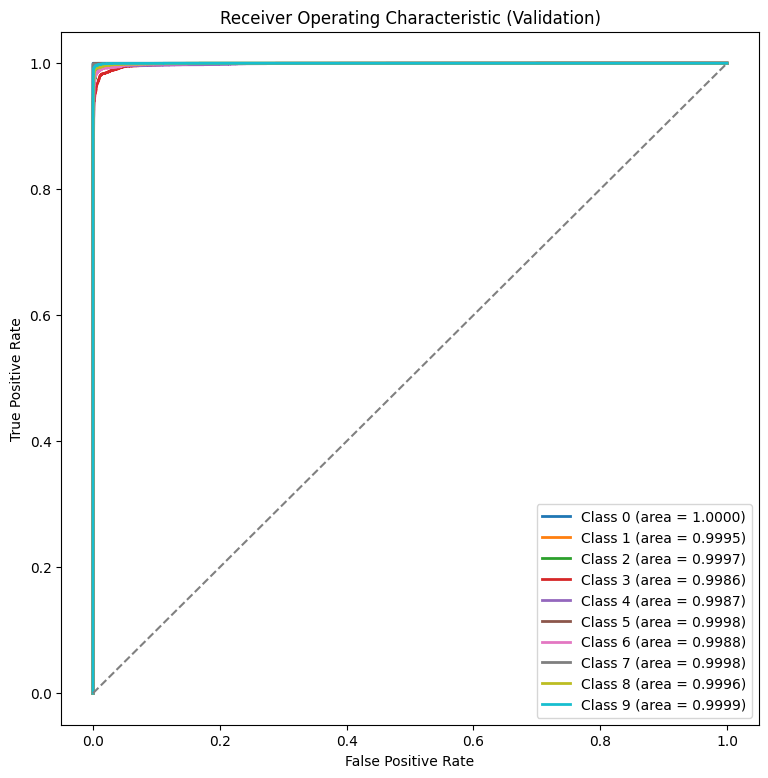

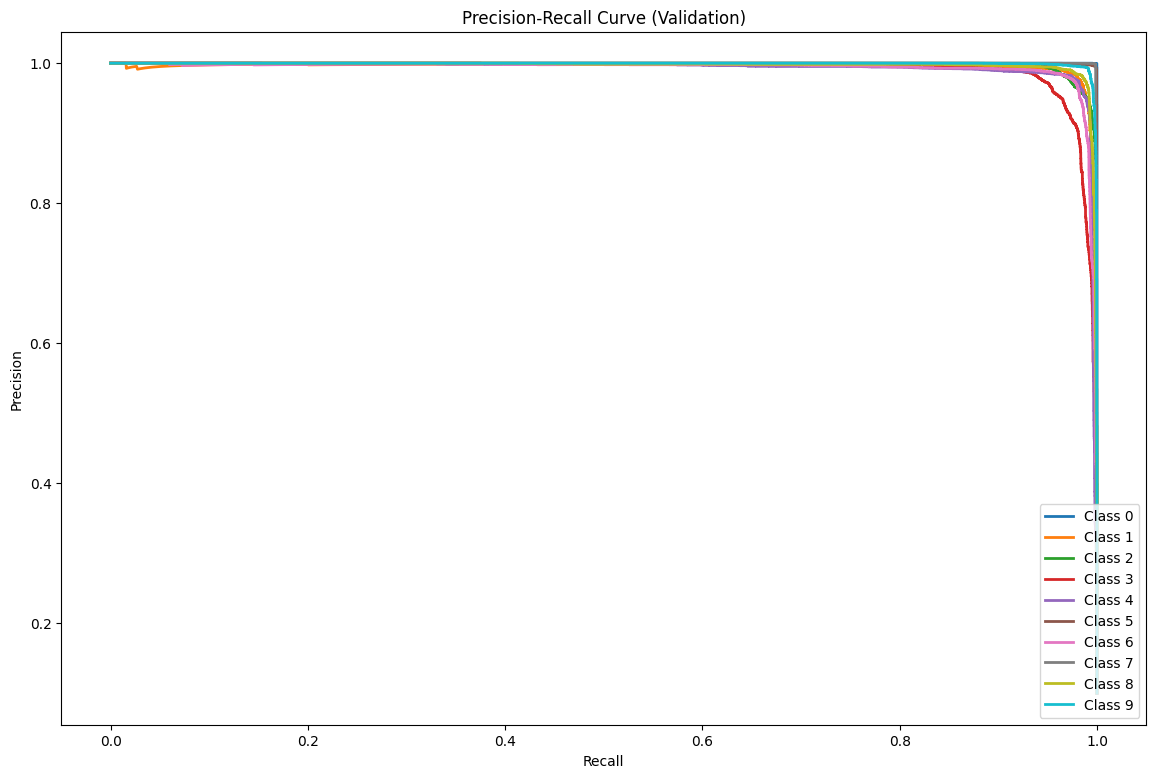


Metrics (Validation):
Accuracy: 98.309966%
Precision: 98.309283%
Recall: 98.307430%
F1 Score: 98.305238%
Loss: 0.073621
Elapsed Time: 8.72 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   0.999730  0.998112  0.998920      3708
           1   0.987003  0.979901  0.983439      4030
           2   0.963959  0.969530  0.966737      3807
           3   0.983164  0.944060  0.963215      3897
           4   0.543909  0.950495  0.691892       202
           5   0.999170  0.996688  0.997927      8454
           6   0.982643  0.981426  0.982034      4038
           7   0.994889  0.999658  0.997268      2921
           8   0.972455  0.988500  0.980412      4000
           9   0.998667  0.986504  0.992548      3038

    accuracy                       0.983646     38095
   macro avg   0.942559  0.979487  0.955439     38095
weighted avg   0.985442  0.983646  0.984197     38095



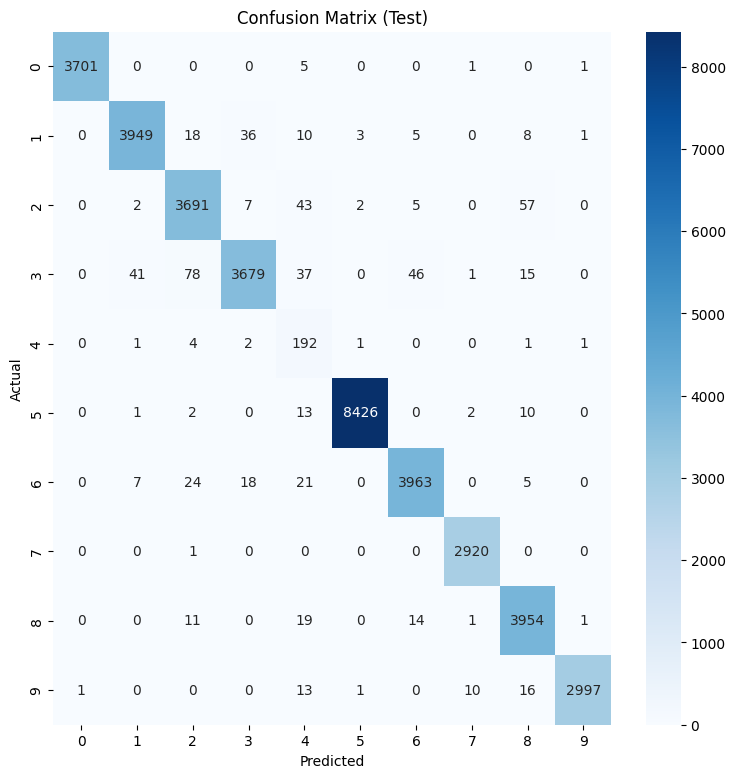

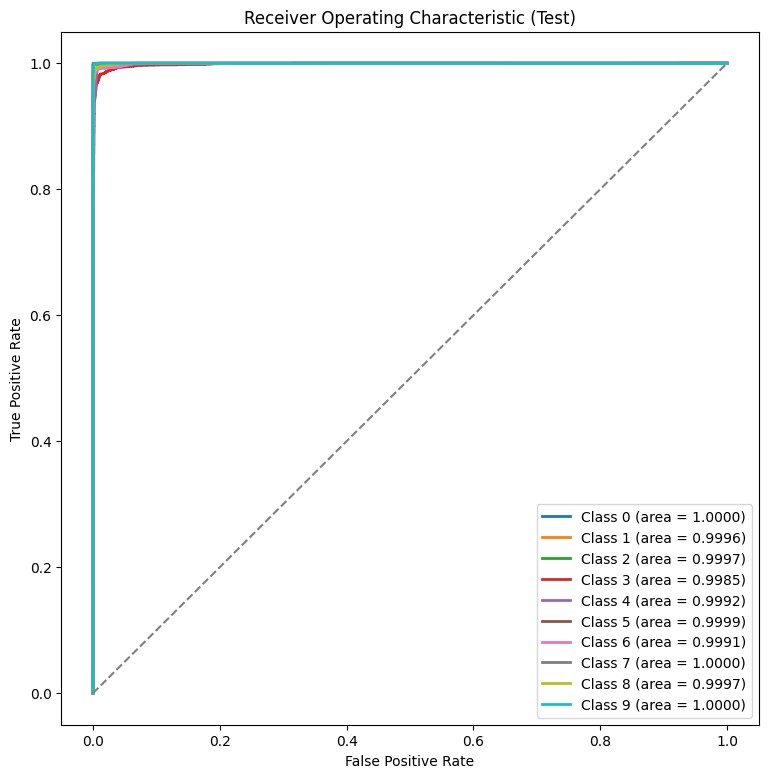

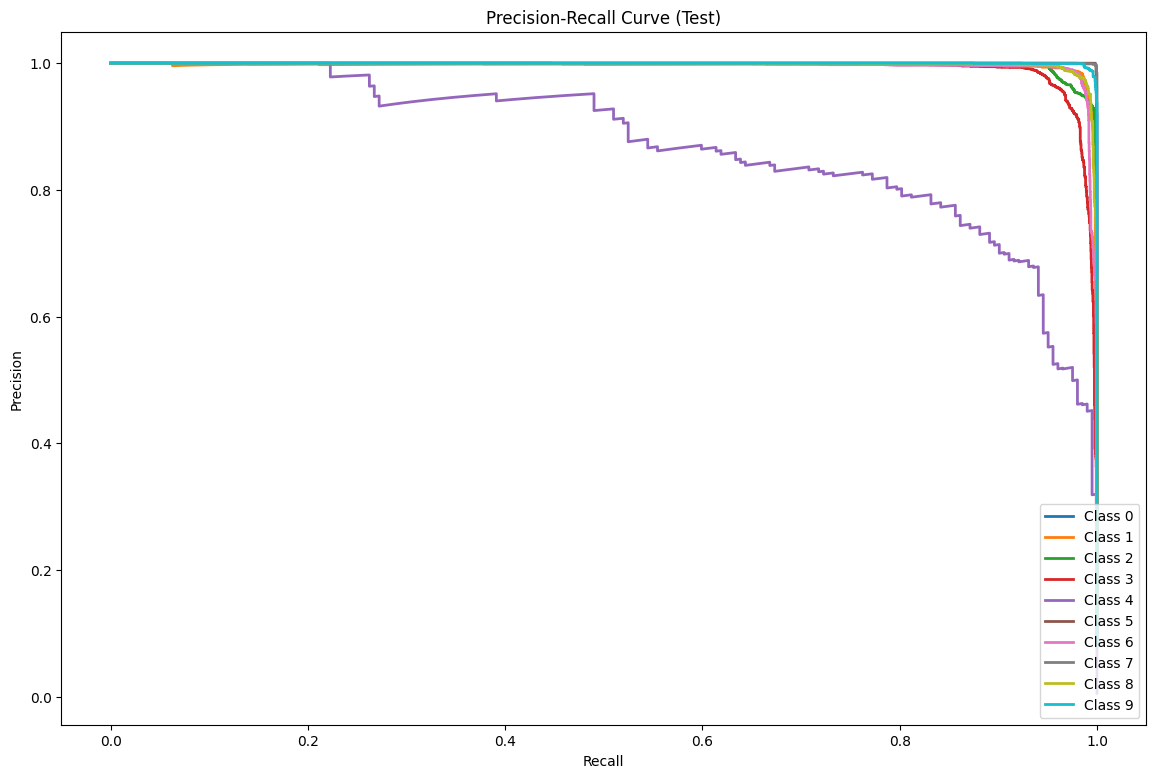


Metrics (Test):
Accuracy: 98.364615%
Precision: 94.255898%
Recall: 97.948737%
F1 Score: 95.543927%
Loss: 0.067056
Elapsed Time: 5.17 seconds


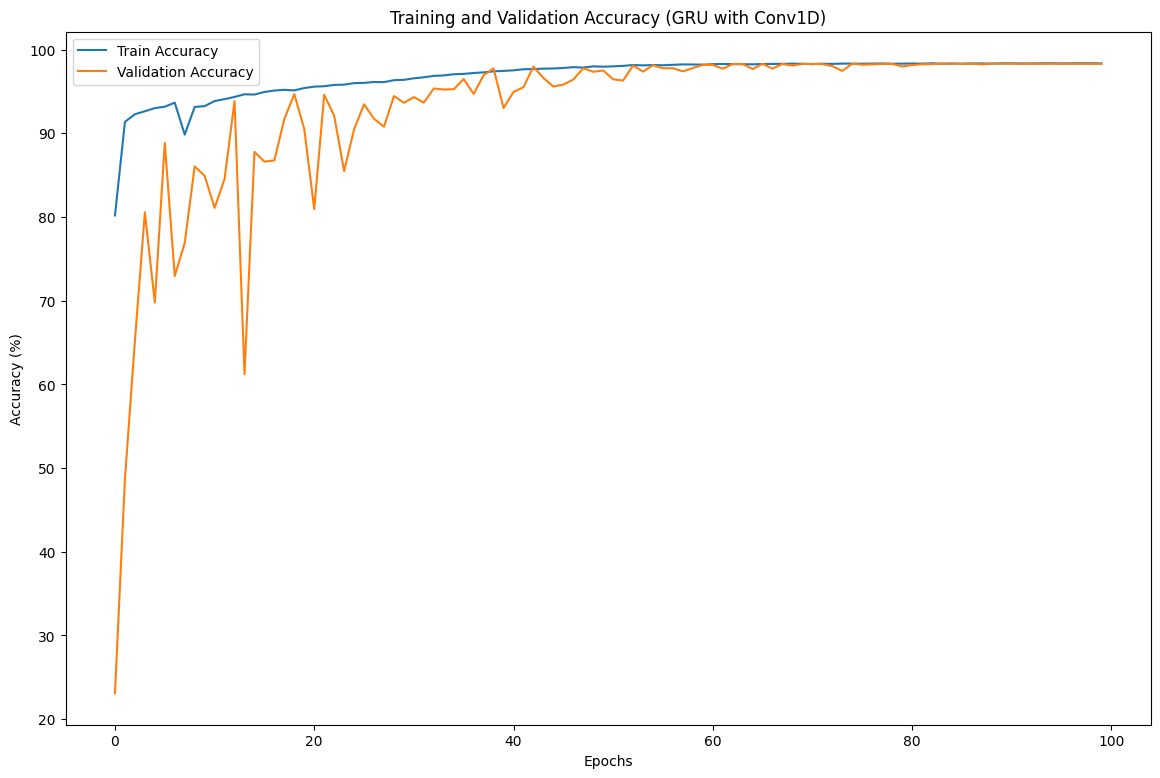

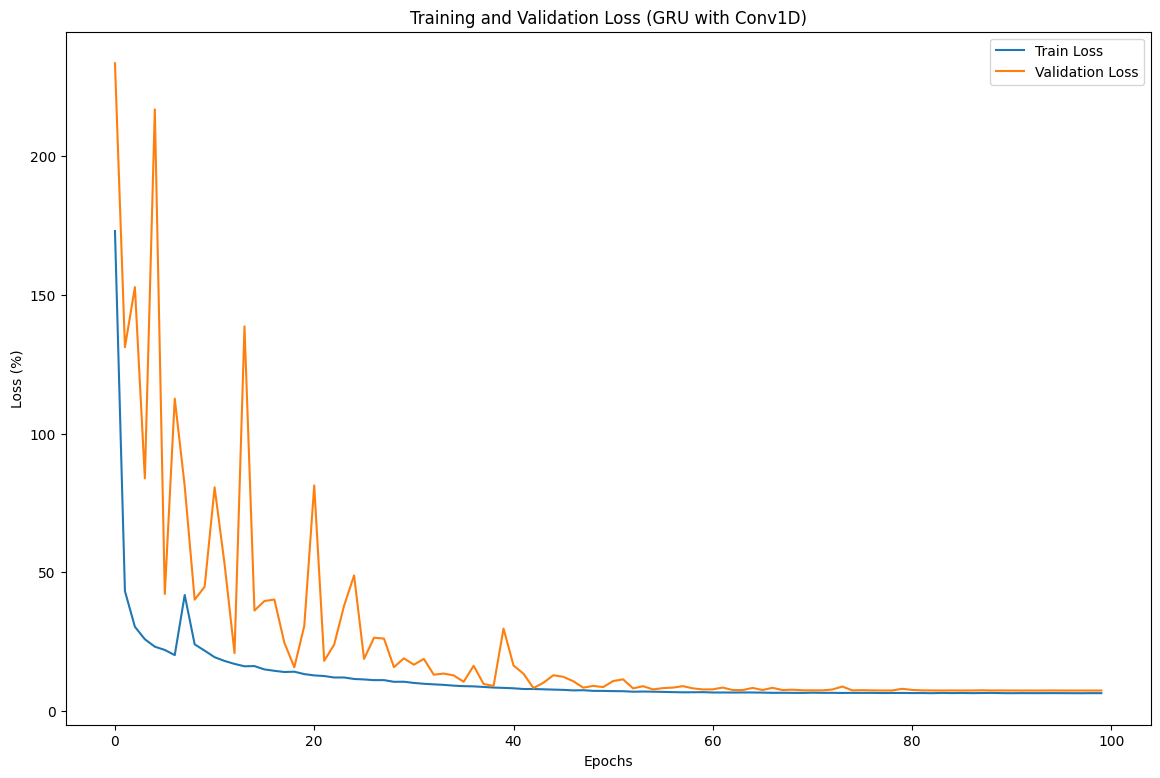

Epoch 1 - Train Loss: 172.9771%, Validation Loss: 233.46%, Train Accuracy: 80.19%, Validation Accuracy: 23.10%
Epoch 2 - Train Loss: 43.1808%, Validation Loss: 131.11%, Train Accuracy: 91.38%, Validation Accuracy: 48.70%
Epoch 3 - Train Loss: 30.3415%, Validation Loss: 152.77%, Train Accuracy: 92.29%, Validation Accuracy: 65.18%
Epoch 4 - Train Loss: 25.8430%, Validation Loss: 83.83%, Train Accuracy: 92.64%, Validation Accuracy: 80.56%
Epoch 5 - Train Loss: 23.1604%, Validation Loss: 216.81%, Train Accuracy: 93.02%, Validation Accuracy: 69.77%
Epoch 6 - Train Loss: 21.9895%, Validation Loss: 42.14%, Train Accuracy: 93.19%, Validation Accuracy: 88.86%
Epoch 7 - Train Loss: 20.1263%, Validation Loss: 112.58%, Train Accuracy: 93.67%, Validation Accuracy: 72.95%
Epoch 8 - Train Loss: 41.7994%, Validation Loss: 81.02%, Train Accuracy: 89.86%, Validation Accuracy: 76.90%
Epoch 9 - Train Loss: 24.0012%, Validation Loss: 40.11%, Train Accuracy: 93.16%, Validation Accuracy: 86.07%
Epoch 10 - Tr

In [ ]:

def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)


    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))


    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()


    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))


    plt.figure(figsize=(9, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")



evaluate_model(model_gru_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes=10, dataset_name="Validation")
evaluate_model(model_gru_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes=10, dataset_name="Test")


plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_gru_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (GRU with Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 9))
plt.plot(np.array(history_gru_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_gru_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (GRU with Conv1D)')
plt.legend()
plt.show()



for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_gru_cnn.history['loss'],
                                                                      history_gru_cnn.history['val_loss'],
                                                                      history_gru_cnn.history['accuracy'],
                                                                      history_gru_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_gru_cnn.pkl', 'wb') as file:
    pickle.dump(history_gru_cnn.history, file)

#***CNN_RNN***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, precision_score, recall_score
import seaborn as sns


def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure it returns a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure it returns a float

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#  CNN_RNN Model
model_rnn_cnn = Sequential()
model_rnn_cnn.add(Conv1D(64, 3, activation='relu', input_shape=X_TON_IOT_train.shape[1:]))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(Conv1D(128, 3, activation='relu'))
model_rnn_cnn.add(MaxPooling1D(pool_size=2))
model_rnn_cnn.add(SimpleRNN(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(SimpleRNN(256, activation='tanh', kernel_regularizer=l2(0.01)))
model_rnn_cnn.add(BatchNormalization())
model_rnn_cnn.add(Dropout(0.5))
model_rnn_cnn.add(Flatten())
model_rnn_cnn.add(Dense(10, activation='softmax'))

model_rnn_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()


history_rnn_cnn = model_rnn_cnn.fit(X_TON_IOT_train, y_TON_IOT_train_one_hot, epochs=100, batch_size=1024,
                                    validation_data=(X_TON_IOT_valid, y_TON_IOT_valid_one_hot),
                                    callbacks=[lr_scheduler], verbose=1)
end_time = time.time()
training_time = end_time - start_time


# training_time
print(f"Le temps d'entraînement du modèle CNN_RNN est de {training_time:.2f} secondes.")

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7481 - loss: 2.9003 - val_accuracy: 0.9166 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9205 - loss: 0.5212 - val_accuracy: 0.9052 - val_loss: 0.3760 - learning_rate: 0.0010
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9306 - loss: 0.2921 - val_accuracy: 0.9206 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9330 - loss: 0.2361 - val_accuracy: 0.9309 - val_loss: 0.2244 - learning_rate: 0.0010
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9361 - loss: 0.2082 - val_accuracy: 0.9381 - val_loss: 0.1864 - learning_rate: 0.0010
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9406 - loss: 0.1879 - val_accuracy: 0.9418 - val_loss: 0.1882 - learning_rate: 0.0010
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9390 -

2648/2648 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step

Classification Report (Validation):
              precision    recall  f1-score   support

           0   0.999295  1.000000  0.999648      8508
           1   0.983013  0.987088  0.985046      8442
           2   0.965930  0.983193  0.974485      8449
           3   0.984847  0.962331  0.973459      8442
           4   0.980052  0.984325  0.982184      8485
           5   0.999410  0.999410  0.999410      8480
           6   0.986679  0.986098  0.986389      8488
           7   0.999647  0.997766  0.998705      8504
           8   0.987599  0.985852  0.986725      8482
           9   0.991600  0.991600  0.991600      8452

    accuracy                       0.987785     84732
   macro avg   0.987807  0.987766  0.987765     84732
weighted avg   0.987824  0.987785  0.987783     84732



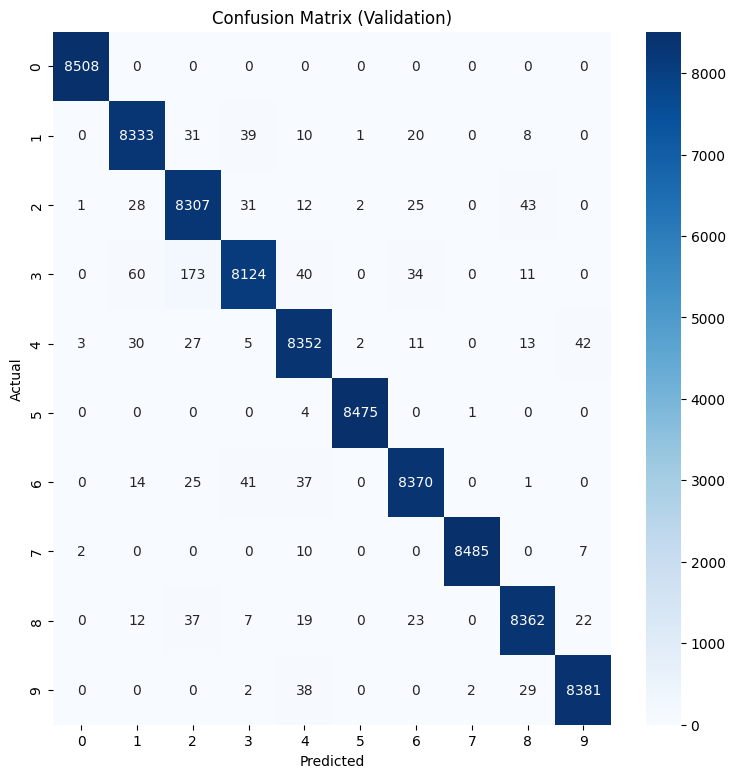

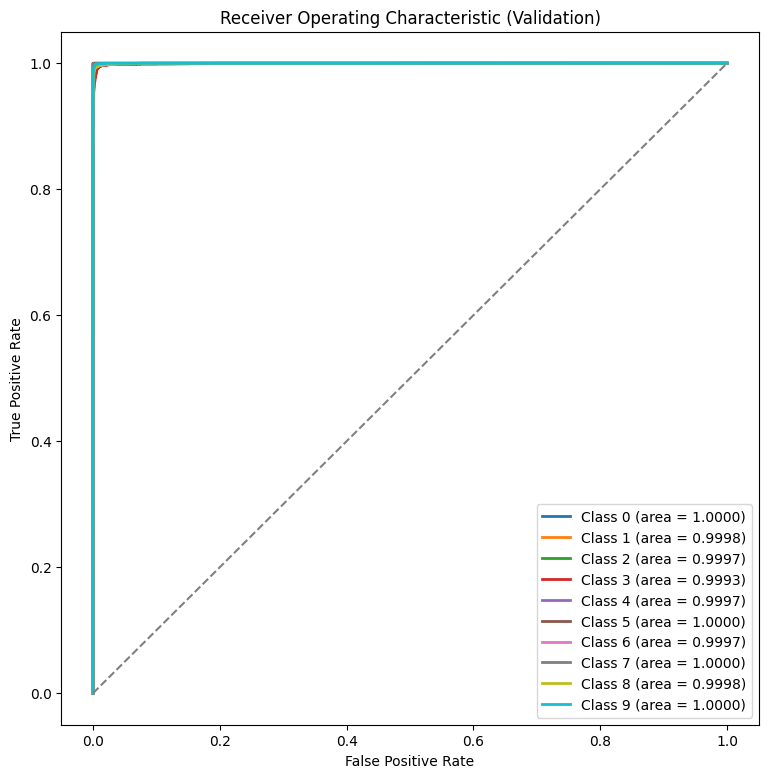

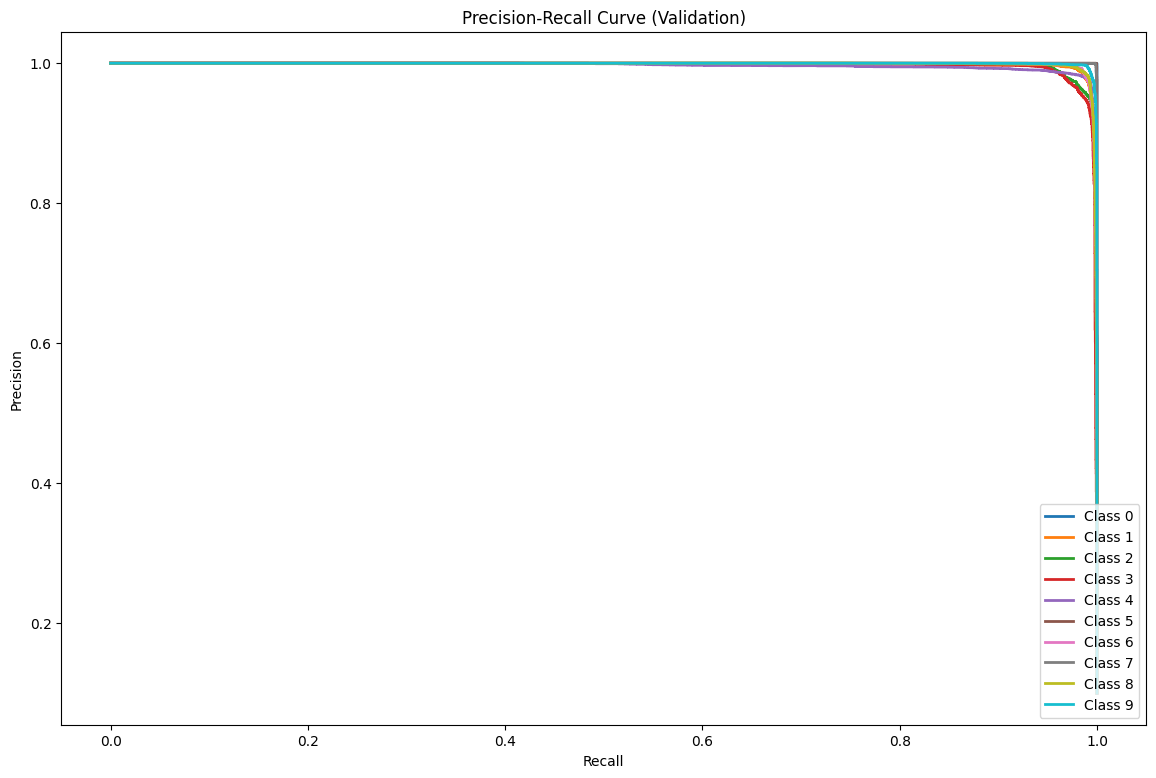


Metrics (Validation):
Accuracy: 98.778502%
Precision: 98.780714%
Recall: 98.776643%
F1 Score: 98.776505%
Loss: 0.046066
Elapsed Time: 10.24 seconds
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step

Classification Report (Test):
              precision    recall  f1-score   support

           0   0.999730  1.000000  0.999865      3708
           1   0.989765  0.983871  0.986809      4030
           2   0.962733  0.977147  0.969887      3807
           3   0.988830  0.954067  0.971138      3897
           4   0.685512  0.960396  0.800000       202
           5   0.999763  0.998699  0.999231      8454
           6   0.989591  0.988856  0.989223      4038
           7   0.997950  1.000000  0.998974      2921
           8   0.977772  0.989750  0.983725      4000
           9   0.998343  0.991442  0.994880      3038

    accuracy                       0.987872     38095
   macro avg   0.958999  0.984423  0.969373     38095
weighted avg   0.988577  0.987872  0.988060     38095



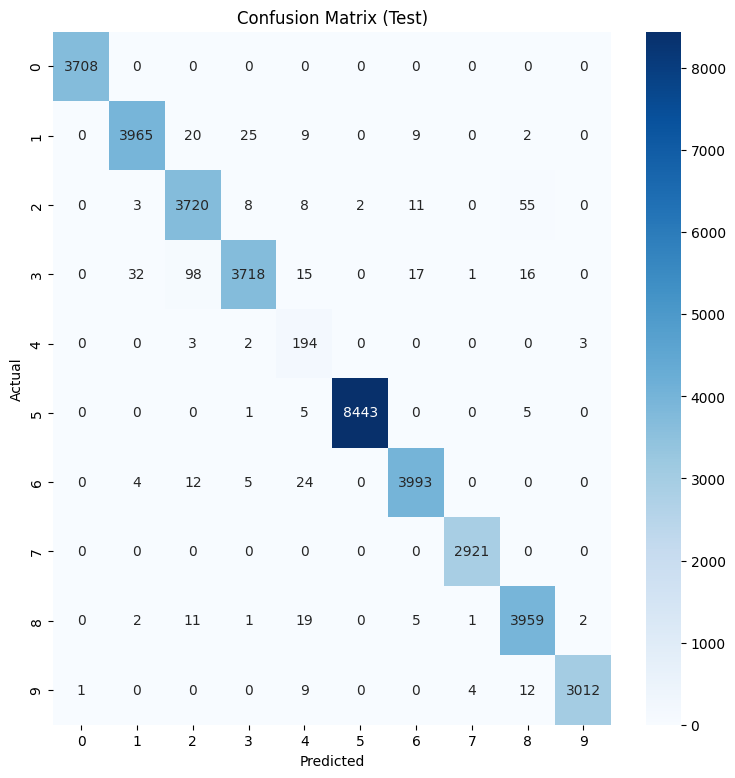

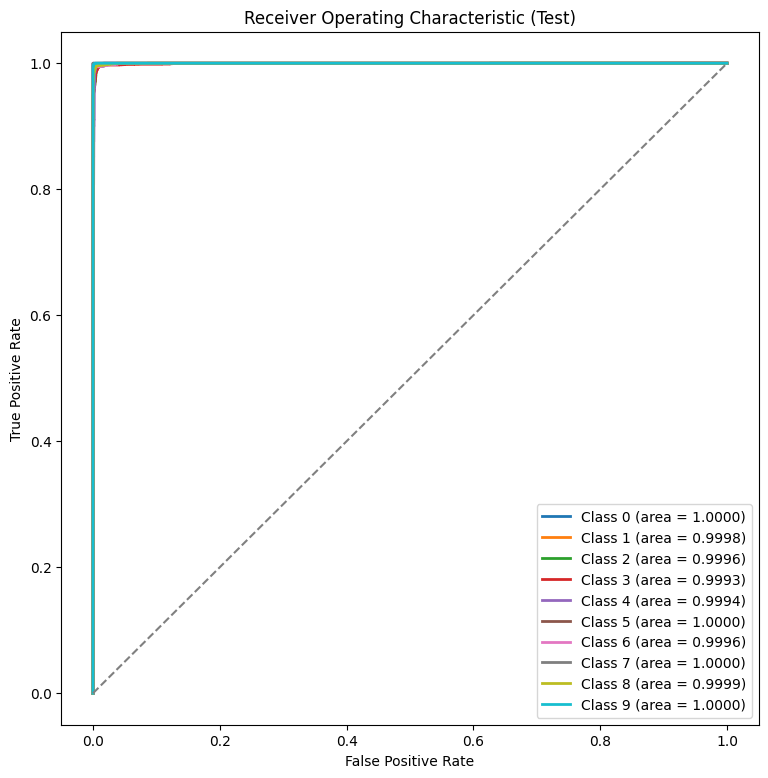

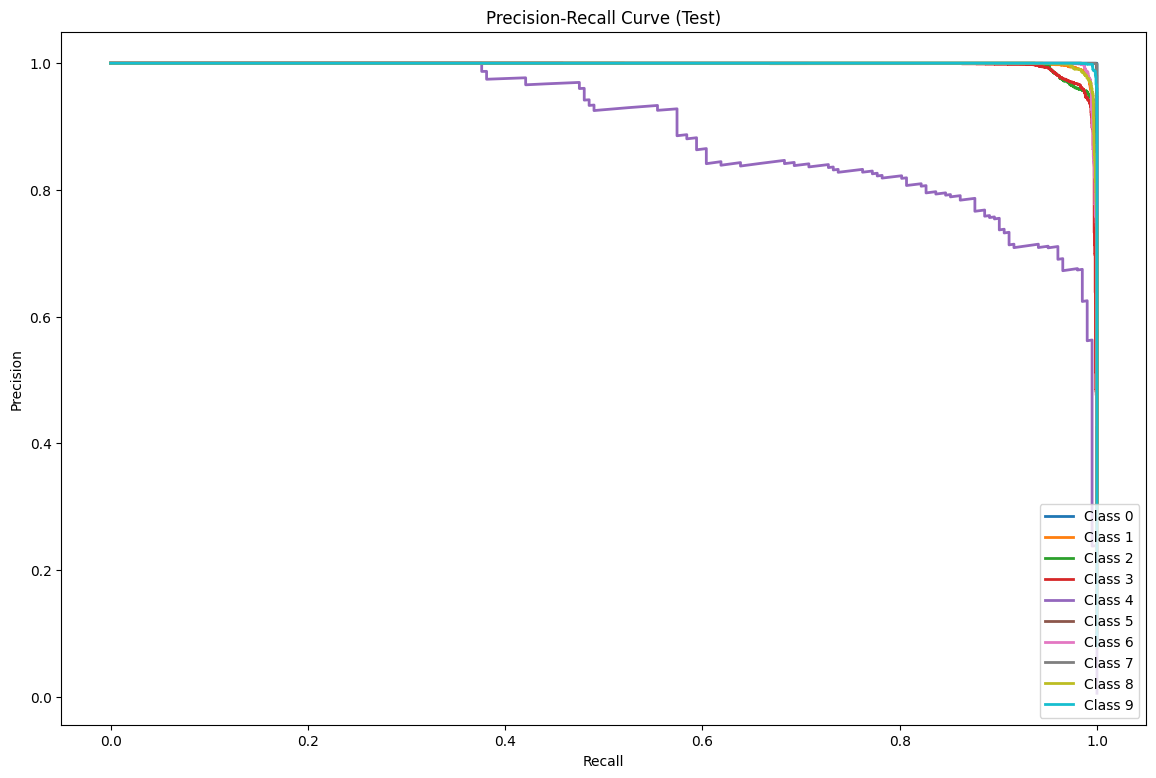


Metrics (Test):
Accuracy: 98.787242%
Precision: 95.899902%
Recall: 98.442280%
F1 Score: 96.937317%
Loss: 0.044760
Elapsed Time: 10.30 seconds


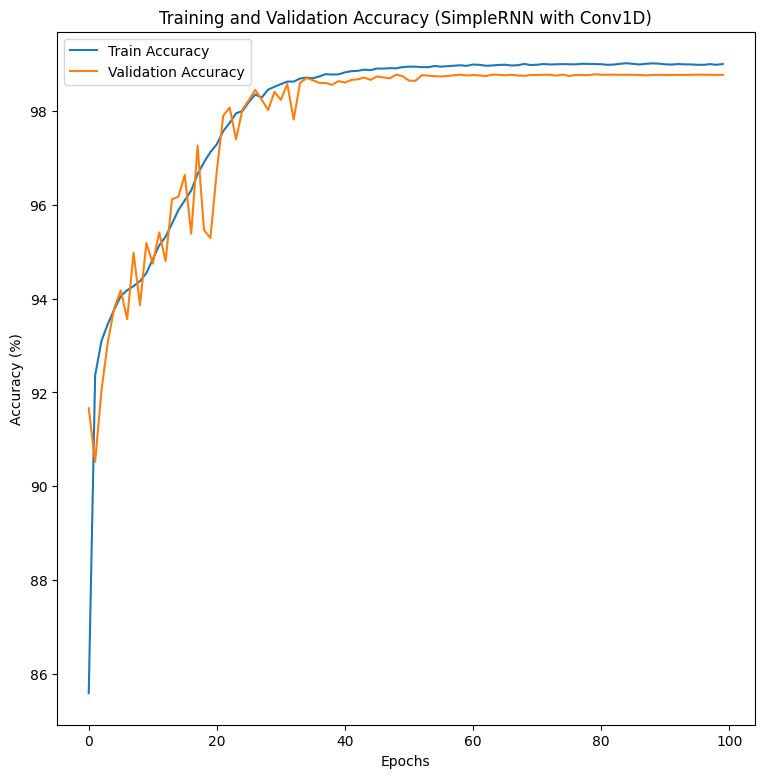

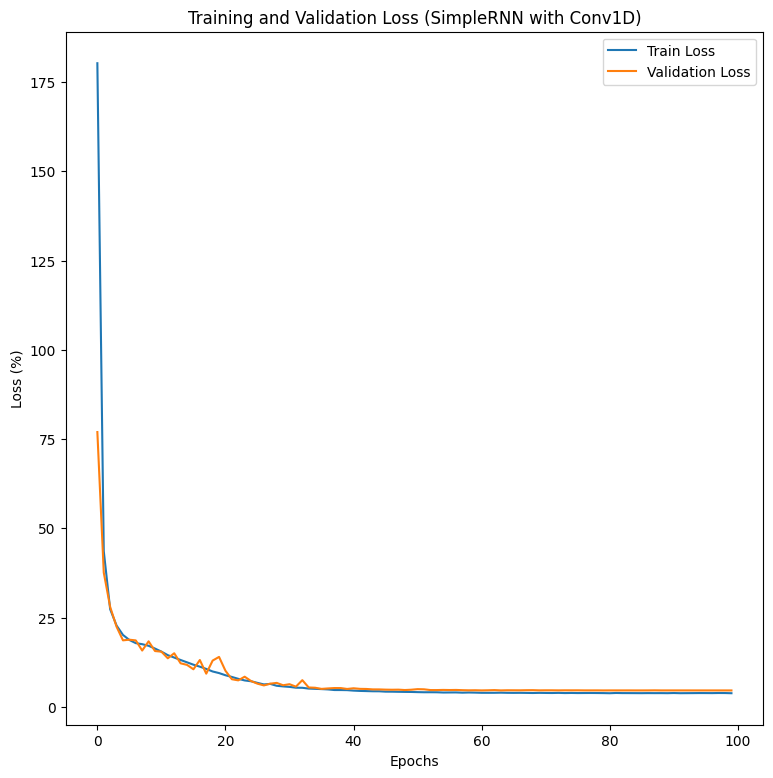

Epoch 1 - Train Loss: 180.2638%, Validation Loss: 76.97%, Train Accuracy: 85.58%, Validation Accuracy: 91.66%
Epoch 2 - Train Loss: 43.6142%, Validation Loss: 37.60%, Train Accuracy: 92.36%, Validation Accuracy: 90.52%
Epoch 3 - Train Loss: 27.3361%, Validation Loss: 27.99%, Train Accuracy: 93.11%, Validation Accuracy: 92.06%
Epoch 4 - Train Loss: 22.7776%, Validation Loss: 22.44%, Train Accuracy: 93.47%, Validation Accuracy: 93.09%
Epoch 5 - Train Loss: 20.1478%, Validation Loss: 18.64%, Train Accuracy: 93.77%, Validation Accuracy: 93.81%
Epoch 6 - Train Loss: 18.7351%, Validation Loss: 18.82%, Train Accuracy: 94.05%, Validation Accuracy: 94.18%
Epoch 7 - Train Loss: 17.8500%, Validation Loss: 18.62%, Train Accuracy: 94.18%, Validation Accuracy: 93.56%
Epoch 8 - Train Loss: 17.5596%, Validation Loss: 15.78%, Train Accuracy: 94.27%, Validation Accuracy: 94.98%
Epoch 9 - Train Loss: 17.1074%, Validation Loss: 18.36%, Train Accuracy: 94.38%, Validation Accuracy: 93.86%
Epoch 10 - Train L

In [ ]:

def evaluate_model(model, X, y_one_hot, num_classes, dataset_name="Validation"):
    start_time = time.time()
    y_pred_proba = model.predict(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_one_hot, axis=1)


    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y_true, y_pred, digits=6))


    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 9))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()


    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))


    plt.figure(figsize=(9, 9))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    plt.figure(figsize=(14, 9))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ({dataset_name})')
    plt.legend(loc="lower right")
    plt.show()


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    loss = model.evaluate(X, y_one_hot, verbose=0)

    print(f"\nMetrics ({dataset_name}):")
    print(f"Accuracy: {accuracy * 100:.6f}%")
    print(f"Precision: {precision * 100:.6f}%")
    print(f"Recall: {recall * 100:.6f}%")
    print(f"F1 Score: {f1 * 100:.6f}%")
    print(f"Loss: {loss[0]:.6f}")
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")



evaluate_model(model_rnn_cnn, X_TON_IOT_valid, y_TON_IOT_valid_one_hot, num_classes=10, dataset_name="Validation")
evaluate_model(model_rnn_cnn, X_TON_IOT_test2, y_TON_IOT_test2_one_hot, num_classes=10, dataset_name="Test")



plt.figure(figsize=(9, 9))
plt.plot(np.array(history_rnn_cnn.history['accuracy']) * 100, label='Train Accuracy')
plt.plot(np.array(history_rnn_cnn.history['val_accuracy']) * 100, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy (SimpleRNN with Conv1D)')
plt.legend()
plt.show()

plt.figure(figsize=(9, 9))
plt.plot(np.array(history_rnn_cnn.history['loss']) * 100, label='Train Loss')
plt.plot(np.array(history_rnn_cnn.history['val_loss']) * 100, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.title('Training and Validation Loss (SimpleRNN with Conv1D)')
plt.legend()
plt.show()



for epoch, (loss, val_loss, accuracy, val_accuracy) in enumerate(zip(history_rnn_cnn.history['loss'],
                                                                      history_rnn_cnn.history['val_loss'],
                                                                      history_rnn_cnn.history['accuracy'],
                                                                      history_rnn_cnn.history['val_accuracy']), 1):
    print(f"Epoch {epoch} - Train Loss: {loss * 100:.4f}%, Validation Loss: {val_loss * 100:.2f}%, Train Accuracy: {accuracy * 100:.2f}%, Validation Accuracy: {val_accuracy * 100:.2f}%")

In [ ]:
import pickle
with open('history_rnn_cnn.pkl', 'wb') as file:
    pickle.dump(history_rnn_cnn.history, file)

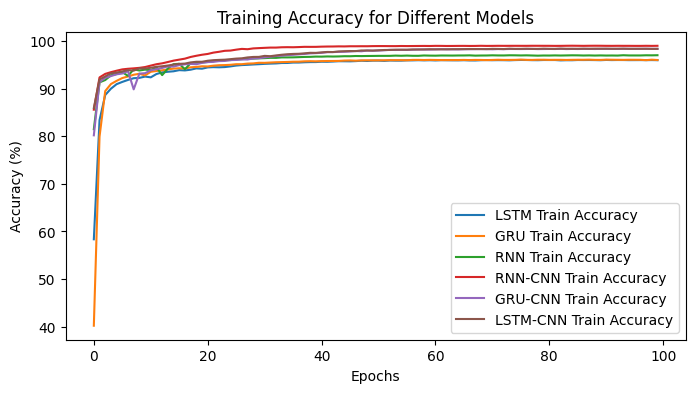

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the history objects for different models
with open('history_lstm.pkl', 'rb') as file:
    history_lstm = pickle.load(file)
with open('history_gru.pkl', 'rb') as file:
    history_gru = pickle.load(file)
with open('history_rnn.pkl', 'rb') as file:
    history_rnn = pickle.load(file)
with open('history_rnn_cnn.pkl', 'rb') as file:
    history_rnn_cnn = pickle.load(file)
with open('history_gru_cnn.pkl', 'rb') as file:
    history_gru_cnn = pickle.load(file)
with open('history_lstm_cnn.pkl', 'rb') as file:
    history_lstm_cnn = pickle.load(file)


# Plotting the training accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(np.array(history_lstm['accuracy']) * 100, label='LSTM Train Accuracy')
plt.plot(np.array(history_gru['accuracy']) * 100, label='GRU Train Accuracy')
plt.plot(np.array(history_rnn['accuracy']) * 100, label='RNN Train Accuracy')
plt.plot(np.array(history_rnn_cnn['accuracy']) * 100, label='RNN-CNN Train Accuracy')
plt.plot(np.array(history_gru_cnn['accuracy']) * 100, label='GRU-CNN Train Accuracy')
plt.plot(np.array(history_lstm_cnn['accuracy']) * 100, label='LSTM-CNN Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy for Different Models')
plt.legend()
plt.show()



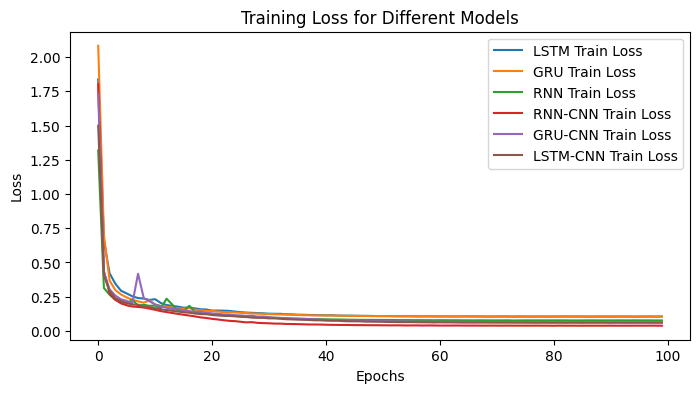

In [ ]:
# Plotting the training loss curves
plt.figure(figsize=(8, 4))
plt.plot(history_lstm['loss'], label='LSTM Train Loss')
plt.plot(history_gru['loss'], label='GRU Train Loss')
plt.plot(history_rnn['loss'], label='RNN Train Loss')
plt.plot(history_rnn_cnn['loss'], label='RNN-CNN Train Loss')
plt.plot(history_gru_cnn['loss'], label='GRU-CNN Train Loss')
plt.plot(history_lstm_cnn['loss'], label='LSTM-CNN Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Models')
plt.legend()
plt.show()
